In [ ]:
'''
import klib
# klib.clean - functions for cleaning datasets
- klib.data_cleaning(df) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)
- klib.clean_column_names(df) # cleans and standardizes column names, also called inside data_cleaning()
- klib.convert_datatypes(df) # converts existing to more efficient dtypes, also called inside data_cleaning()
- klib.drop_missing(df) # drops missing values, also called in data_cleaning()
- klib.mv_col_handling(df) # drops features with high ratio of missing vals based on informational content
- klib.pool_duplicate_subsets(df) # pools subset of cols based on duplicates with min. loss of information
'''

In [ ]:
#drop unnecessary columns
'''
to_drop = ['Restaurant ID']

df.drop(to_drop, inplace = True, axis = 1)
df.head()
'''

In [ ]:
#convert date to datetime

'''
df['DT_OF_CONN'] = pd.to_datetime(df['DT_OF_CONN'])
df['DT_OF_CONN'].value_counts()
'''

# 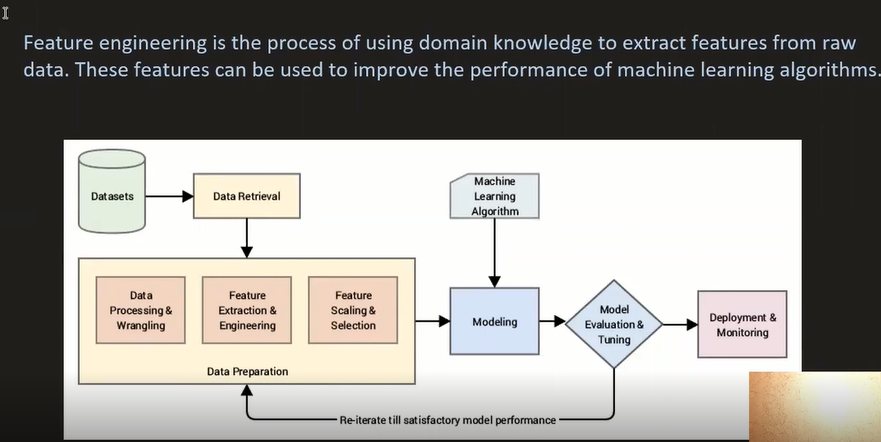

In [63]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

# which algorithm work well on normally distributed data?

In [ ]:
-linear regression
-logistic regression 
-knn

# Column transformation

In [2]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer       #fever
from sklearn.preprocessing import OneHotEncoder     #gender,city
from sklearn.preprocessing import OrdinalEncoder       #cough

df = pd.read_csv('covid_toy.txt')
df.head(2)

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes


In [2]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

# General method

In [20]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['has_covid']),df['has_covid'],test_size=0.2)
                                                


# adding simple imputer to fever col
si = SimpleImputer()
X_train_fever = si.fit_transform(X_train[['fever']])
X_test_fever = si.fit_transform(X_test[['fever']]) # also the test data
                                 


# Ordinalencoding -> cough
oe = OrdinalEncoder(categories=[['Mild','Strong']])         # give preference in categeries
X_train_cough = oe.fit_transform(X_train[['cough']])
X_test_cough = oe.fit_transform(X_test[['cough']])# also the test data


# OneHotEncoding -> gender,city
ohe = OneHotEncoder(drop='first',sparse=False)
X_train_gender_city = ohe.fit_transform(X_train[['gender','city']])# also the test data
X_test_gender_city = ohe.fit_transform(X_test[['gender','city']])



# Extracting Age
X_train_age = X_train.drop(columns=['gender','fever','cough','city']).values
X_test_age = X_test.drop(columns=['gender','fever','cough','city']).values   # also the test data


#adding all columns
X_train_transformed = np.concatenate((X_train_age,X_train_fever,X_train_gender_city,X_train_cough),axis=1)
X_test_transformed = np.concatenate((X_test_age,X_test_fever,X_test_gender_city,X_test_cough),axis=1)# also the test data






X_train_fever.shape,X_train_cough.shape,X_train_gender_city.shape,X_train_age.shape,X_train_transformed.shape,X_test_transformed.shape




((80, 1), (80, 1), (80, 4), (80, 1), (80, 7), (20, 7))

# With column transformer

In [21]:
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3',OneHotEncoder(sparse=False,drop='first'),['gender','city'])],remainder='passthrough')

#remainder=passthrough(other feature unchanged)/drop(other features deleted)
#instead of column name--prefer giving index of column

transformer.fit_transform(X_train).shape,transformer.transform(X_test).shape


((80, 7), (20, 7))

# scikit learn pipelines

# Without pipeline

In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier


df = pd.read_csv('train.txt')

df,df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True),df.isnull().sum()


(     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
 0           0       3    male  22.0      1      0   7.2500        S
 1           1       1  female  38.0      1      0  71.2833        C
 2           1       3  female  26.0      0      0   7.9250        S
 3           1       1  female  35.0      1      0  53.1000        S
 4           0       3    male  35.0      0      0   8.0500        S
 ..        ...     ...     ...   ...    ...    ...      ...      ...
 886         0       2    male  27.0      0      0  13.0000        S
 887         1       1  female  19.0      0      0  30.0000        S
 888         0       3  female   NaN      1      2  23.4500        S
 889         1       1    male  26.0      0      0  30.0000        C
 890         0       3    male  32.0      0      0   7.7500        Q
 
 [891 rows x 8 columns],
 None,
 Survived      0
 Pclass        0
 Sex           0
 Age         177
 SibSp         0
 Parch         0
 Fare          0
 Embarked      2
 d

In [36]:
# Step 1 -> train/test/split

X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),df['Survived'], test_size=0.2, random_state=42)
                                                                                          
# Applying imputation

si_age = SimpleImputer()
X_train_age = si_age.fit_transform(X_train[['Age']])
X_test_age = si_age.transform(X_test[['Age']])


si_embarked = SimpleImputer(strategy='most_frequent')       #most freq means mode
X_train_embarked = si_embarked.fit_transform(X_train[['Embarked']])
X_test_embarked = si_embarked.transform(X_test[['Embarked']])


# one hot encoding Sex and Embarked

ohe_sex = OneHotEncoder(sparse=False,handle_unknown='ignore')
X_train_sex = ohe_sex.fit_transform(X_train[['Sex']])
X_test_sex = ohe_sex.transform(X_test[['Sex']])


ohe_embarked = OneHotEncoder(sparse=False,handle_unknown='ignore')
X_train_embarked = ohe_embarked.fit_transform(X_train_embarked)
X_test_embarked = ohe_embarked.transform(X_test_embarked)




X_train_rem = X_train.drop(columns=['Sex','Age','Embarked'])
X_test_rem = X_test.drop(columns=['Sex','Age','Embarked'])

X_train_transformed = np.concatenate((X_train_rem,X_train_age,X_train_sex,X_train_embarked),axis=1)
X_test_transformed = np.concatenate((X_test_rem,X_test_age,X_test_sex,X_test_embarked),axis=1)




In [48]:
ohe_sex = OneHotEncoder(sparse=False,handle_unknown='ignore')
ohe_sex

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [49]:
ohe_embarked = OneHotEncoder(sparse=False,handle_unknown='ignore')
ohe_embarked

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [50]:
clf = DecisionTreeClassifier()
clf.fit(X_train_transformed,y_train)


DecisionTreeClassifier()

In [51]:
y_pred = clf.predict(X_test_transformed)
y_pred

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.776536312849162

In [57]:
import pickle                    #to export models
import numpy as np

pickle.dump(ohe_sex,open('models/ohe_sex.pkl','wb'))        # create new folder named models and store them there
pickle.dump(ohe_embarked,open('models/ohe_embarked.pkl','wb'))
pickle.dump(clf,open('models/clf.pkl','wb'))


Predict withou pipeline

In [61]:
import pickle
import numpy as np

ohe_sex = pickle.load(open('models/ohe_sex.pkl','rb'))
ohe_embarked = pickle.load(open('models/ohe_embarked.pkl','rb'))
clf = pickle.load(open('models/clf.pkl','rb'))

# Assume user input
# Pclass/gender/age/SibSp/Parch/Fare/Embarked

test_input = np.array([2, 'male', 31.0, 0, 0, 10.5, 'S'],dtype=object).reshape(1,7)
test_input

array([[2, 'male', 31.0, 0, 0, 10.5, 'S']], dtype=object)

In [68]:
test_input_sex = ohe_sex.transform(test_input[:,1].reshape(1,1))
test_input_sex

array([[1.]])

In [69]:
test_input_embarked = ohe_embarked.transform(test_input[:,-1].reshape(1,1))
test_input_embarked

array([[1.]])

In [ ]:
test_input_sex = ohe_sex.fit_transform(test_input[:,1].reshape(1,1))
test_input_sex

test_input_embarked = ohe_embarked.fit_transform(test_input[:,-1].reshape(1,1))
test_input_embarked

test_input_age = test_input[:,2].reshape(1,1)

test_input_transformed = np.concatenate((test_input[:,[0,3,4,5]],test_input_age,test_input_sex,test_input_embarked),axis=1)

clf.predict(test_input_transformed)

# Using pipeline

In [26]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline,make_pipeline

from sklearn.feature_selection import SelectKBest,chi2

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [85]:
df = pd.read_csv('train.txt')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# Let's Plan

In [86]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)


In [87]:
# Step 1 -> train/test/split

X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=0.2,random_state=42)                                                 

In [88]:
X_train.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


In [89]:
# imputation transformer
trf1 = ColumnTransformer([
    ('impute_age',SimpleImputer(),[2]),
    ('impute_embarked',SimpleImputer(strategy='most_frequent'),[6])],remainder='passthrough')


# one hot encoding
trf2 = ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,6])],remainder='passthrough')


# Scaling
trf3 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,10))])


# Feature selection
trf4 = SelectKBest(score_func=chi2,k=8)


# train the model
trf5 = DecisionTreeClassifier()


# Create Pipeline

In [90]:
#we prefer this syntax becoz it shows pipeline clearly
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf5',trf5)])

# Alternate Syntax
#pipe = make_pipeline(trf1,trf2,trf3,trf4,trf5)


# train
pipe.fit(X_train,y_train)                       #with algorith--  .fit  and without algo--.fit_transform

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x0000026537943760>)),
                ('trf5', DecisionTreeClassifier())])

# Explore the Pipeline

In [91]:
# Code here
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_age', SimpleImputer(), [2]),
                                 ('impute_embarked',
                                  SimpleImputer(strategy='most_frequent'),
                                  [6])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_sex_embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [1, 6])]),
 'trf3': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 10, None))]),
 'trf4': SelectKBest(k=8, score_func=<function chi2 at 0x0000026537943760>),
 'trf5': DecisionTreeClassifier()}

In [92]:
# Display Pipeline

from sklearn import set_config
set_config(display='diagram')

In [93]:
# Predict
y_pred = pipe.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0], dtype=int64)

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6256983240223464

# Cross Validation using Pipeline

In [95]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

0.6391214419383433

# GridSearch using Pipeline

In [96]:
# gridsearchcv
params = {'trf5__max_depth':[1,2,3,4,5,None]}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_age',
                                                                         SimpleImputer(),
                                                                         [2]),
                                                                        ('impute_embarked',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [6])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe_sex_embarked',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         [1,
                                                                          6])])),
                                       ('trf3',
                                        ColumnTransformer(transformers=[('scale',
                                                                         MinMaxScaler(),
                                                                         slice(0, 10, None))])),
                                       ('trf4',
                                        SelectKBest(k=8,
                                                    score_func=<function chi2 at 0x0000026537943760>)),
                                       ('trf5', DecisionTreeClassifier())]),
             param_grid={'trf5__max_depth': [1, 2, 3, 4, 5, None]},
             scoring='accuracy')

In [97]:
grid.best_score_,grid.best_params_


(0.6391214419383433, {'trf5__max_depth': 2})

# Exporting the Pipeline


In [98]:
# export 
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

# predict-using-pipeline

In [99]:
import pickle
import numpy as np

pipe = pickle.load(open('pipe.pkl','rb'))

# Assume user input
test_input2 = np.array([2, 'male', 31.0, 0, 0, 10.5, 'S'],dtype=object).reshape(1,7)
pipe.predict(test_input2)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

##### 

# 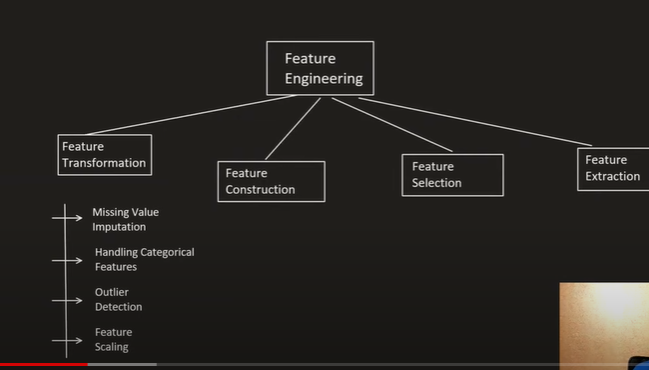

In [106]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df=pd.read_csv('data.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Handling Missing value

# complete-case-analysis[mara+5% rule]

In [3]:
df = pd.read_csv('data_science_job.txt')
df.head()


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [8]:
df.isnull().mean()*100,df.shape



(enrollee_id                0.000000
 city                       0.000000
 city_development_index     2.500261
 gender                    23.530640
 relevent_experience        0.000000
 enrolled_university        2.014824
 education_level            2.401086
 major_discipline          14.683161
 experience                 0.339284
 company_size              30.994885
 company_type              32.049274
 training_hours             3.998330
 target                     0.000000
 dtype: float64,
 (19158, 13))

In [13]:
cols_mis5p = [i for i in df.columns if df[i].isnull().mean() < 0.05 and df[i].isnull().mean() > 0]
cols_mis5p

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [15]:
df[cols_mis5p].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
1445,0.550,NaN,NaN,3.0,28.0
16654,0.920,no_enrollment,Masters,13.0,30.0
15317,0.910,no_enrollment,Masters,15.0,15.0
7925,0.920,no_enrollment,Graduate,11.0,129.0
16325,0.624,no_enrollment,Masters,11.0,77.0


In [16]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [17]:
len(df[cols].dropna()) / len(df)


0.8968577095730244

In [18]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

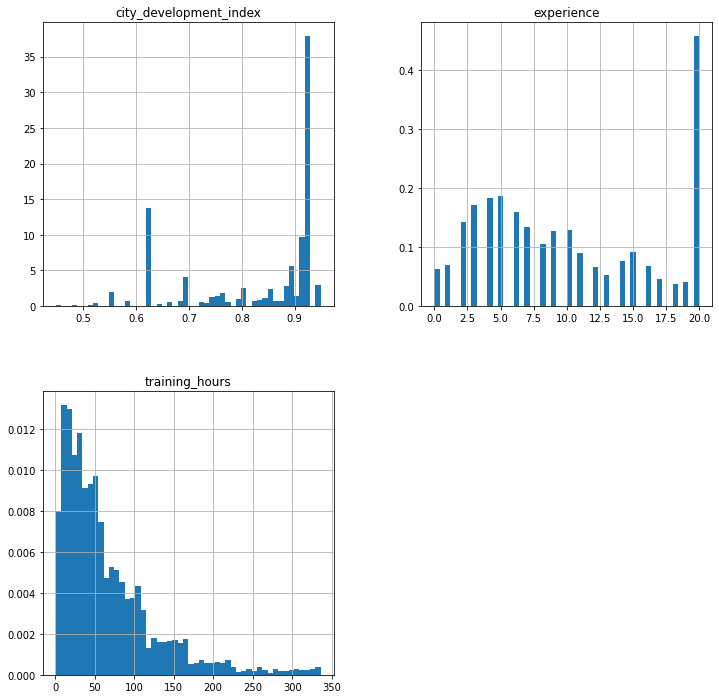

In [19]:
new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

<AxesSubplot:ylabel='Density'>

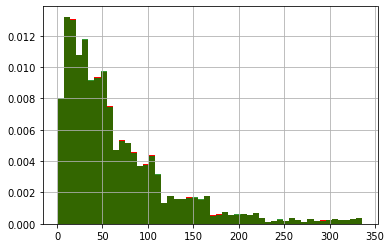

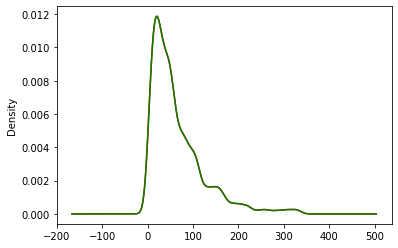

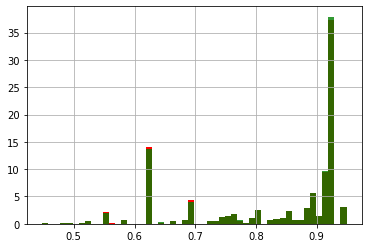

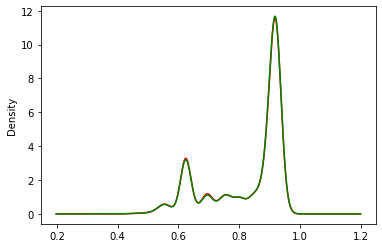

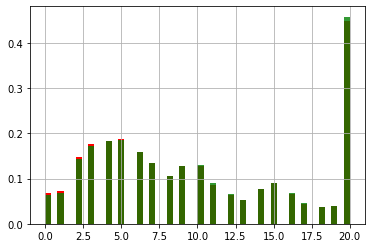

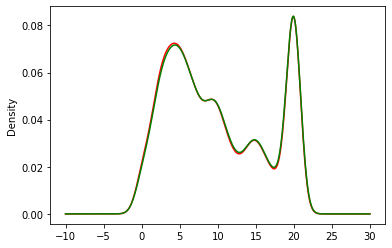

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')
# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

fig = plt.figure()
ax = fig.add_subplot(111)
# original data
df['training_hours'].plot.density(color='red')
# data after cca
new_df['training_hours'].plot.density(color='green')


fig = plt.figure()
ax = fig.add_subplot(111)
# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')
# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)


fig = plt.figure()
ax = fig.add_subplot(111)
# original data
df['city_development_index'].plot.density(color='red')
# data after cca
new_df['city_development_index'].plot.density(color='green')

fig = plt.figure()
ax = fig.add_subplot(111)
# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')
# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)


fig = plt.figure()
ax = fig.add_subplot(111)
# original data
df['experience'].plot.density(color='red')
# data after cca
new_df['experience'].plot.density(color='green')


In [24]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [25]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


# Mean/median imputation

In [ ]:
#2 ways---by fillna()   and ----sklearn(after transformation dataframe creates numpy array)


In [28]:
df = pd.read_csv('titanic_toy.txt')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [32]:
df.info(),df.isnull().mean()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


(None,
 Age         0.198653
 Fare        0.050505
 Family      0.000000
 Survived    0.000000
 dtype: float64)

In [33]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

X_train.shape, X_test.shape

((712, 3), (179, 3))

In [34]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [35]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [36]:
#after imputation variance decrease by small amount
#always cheak variance(deviation from mean)
#cheak there should not be high change in variance



print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.34951339046142
Age Variance after median imputation:  161.98956633460548
Age Variance after mean imputation:  161.81262452718676
Original Fare variable variance:  2448.1979137063163
Fare Variance after median imputation:  2340.09102197536
Fare Variance after mean imputation:  2324.2385256705534


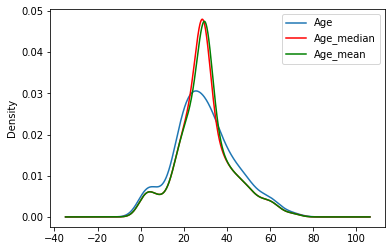

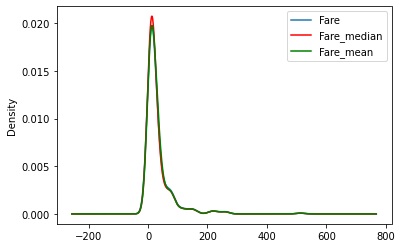

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)
# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')
# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')
# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


fig = plt.figure()
ax = fig.add_subplot(111)
# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)
# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')
# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')
# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [39]:
X_train.cov(),X_train.corr()


(                    Age         Fare     Family  Age_median    Age_mean  \
 Age          204.349513    70.719262  -6.498901  204.349513  204.349513   
 Fare          70.719262  2448.197914  17.258917   57.957599   55.603719   
 Family        -6.498901    17.258917   2.735252   -5.112563   -5.146106   
 Age_median   204.349513    57.957599  -5.112563  161.989566  161.812625   
 Age_mean     204.349513    55.603719  -5.146106  161.812625  161.812625   
 Fare_median   64.858859  2448.197914  16.476305   53.553455   51.358000   
 Fare_mean     66.665205  2448.197914  16.385048   55.023037   52.788341   
 
              Fare_median    Fare_mean  
 Age            64.858859    66.665205  
 Fare         2448.197914  2448.197914  
 Family         16.476305    16.385048  
 Age_median     53.553455    55.023037  
 Age_mean       51.358000    52.788341  
 Fare_median  2340.091022  2324.238526  
 Fare_mean    2324.238526  2324.238526  ,
                   Age      Fare    Family  Age_median  Age_m

<AxesSubplot:>

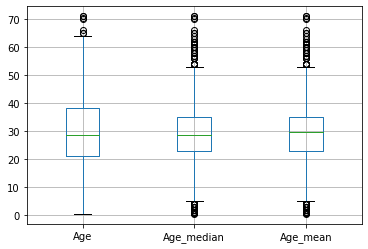

In [41]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()



<AxesSubplot:>

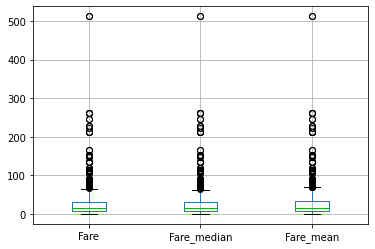

In [42]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

# imputation by sklearn

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])],remainder='passthrough')

trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [44]:
trf.named_transformers_['imputer1'].statistics_,trf.named_transformers_['imputer2'].statistics_

(array([28.75]), array([32.61759689]))

In [45]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

# arbitrary value imputation

In [48]:
df = pd.read_csv('titanic_toy.txt')

X = df.drop(columns=['Survived'])
y = df['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [49]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [50]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.34951339046142
Age Variance after 99 wala imputation:  951.7275570187188
Age Variance after -1 wala imputation:  318.0896202624488
Original Fare variable variance:  2448.1979137063163
Fare Variance after 999 wala imputation:  47219.202652176304
Fare Variance after -1 wala imputation:  2378.5676784883494


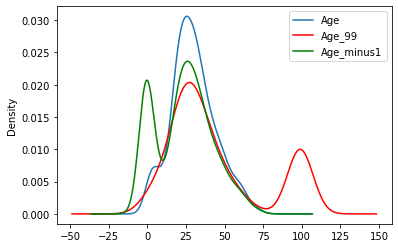

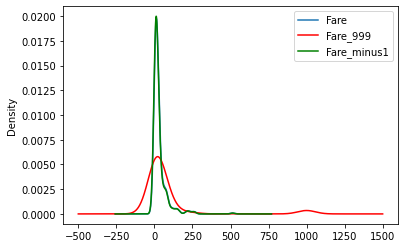

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)
# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')
# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')
# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')



fig = plt.figure()
ax = fig.add_subplot(111)
# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)
# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')
# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')
# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


In [52]:
X_train.cov(),X_train.corr()

(                    Age         Fare     Family      Age_99  Age_minus1  \
 Age          204.349513    70.719262  -6.498901  204.349513  204.349513   
 Fare          70.719262  2448.197914  17.258917 -101.671097  125.558364   
 Family        -6.498901    17.258917   2.735252   -7.387287   -4.149246   
 Age_99       204.349513  -101.671097  -7.387287  951.727557 -189.535540   
 Age_minus1   204.349513   125.558364  -4.149246 -189.535540  318.089620   
 Fare_999     162.793430  2448.197914  11.528625 -159.931663  257.379887   
 Fare_minus1   63.321188  2448.197914  16.553989  -94.317400  114.394141   
 
                  Fare_999  Fare_minus1  
 Age            162.793430    63.321188  
 Fare          2448.197914  2448.197914  
 Family          11.528625    16.553989  
 Age_99        -159.931663   -94.317400  
 Age_minus1     257.379887   114.394141  
 Fare_999     47219.202652   762.474982  
 Fare_minus1    762.474982  2378.567678  ,
                   Age      Fare    Family    Age_99 

In [53]:
#Using Sklearn

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])],remainder='passthrough')

trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [57]:
trf.named_transformers_['imputer1'].statistics_,trf.named_transformers_['imputer2'].statistics_

(array([99.]), array([999.]))

In [62]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)


ValueError: Specifying the columns using strings is only supported for pandas DataFrames

# Handling categorical missing data

# frequent-value-imputation

In [65]:
df = pd.read_csv('train_h.txt',usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


(FireplaceQu    47.260274
 GarageQual      5.547945
 SalePrice       0.000000
 dtype: float64,
 <AxesSubplot:>)

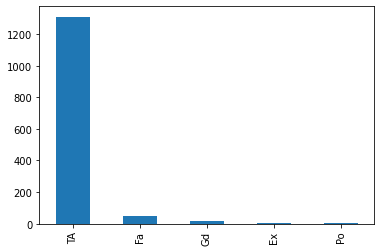

In [67]:
df.isnull().mean()*100,df['GarageQual'].value_counts().plot(kind='bar')

In [68]:
df['GarageQual'].mode()


0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

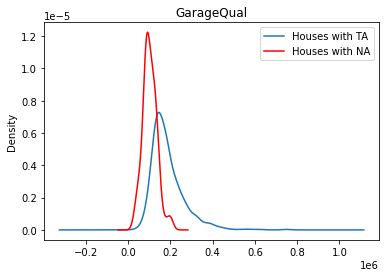

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

<AxesSubplot:>

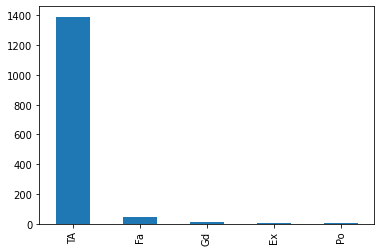

In [70]:
temp = df[df['GarageQual']=='TA']['SalePrice']
df['GarageQual'].fillna('TA', inplace=True)
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

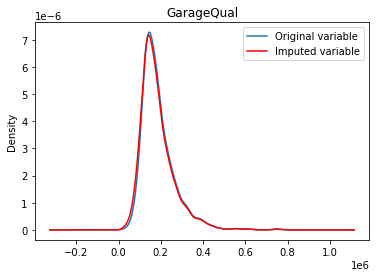

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

<AxesSubplot:>

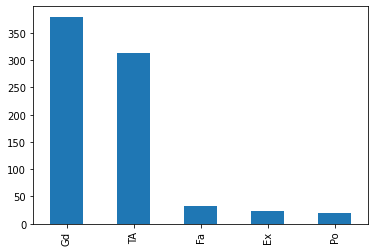

In [72]:
df['FireplaceQu'].value_counts().plot(kind='bar')


In [73]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

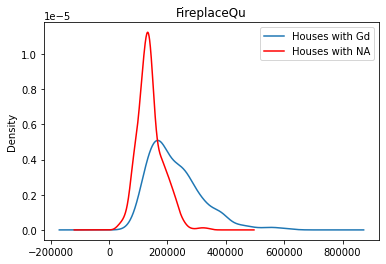

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

<AxesSubplot:>

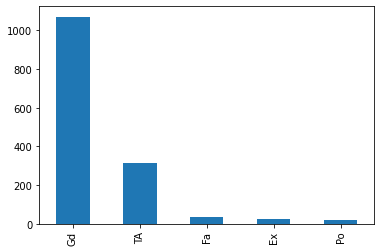

In [75]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']
df['FireplaceQu'].fillna('Gd', inplace=True)
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

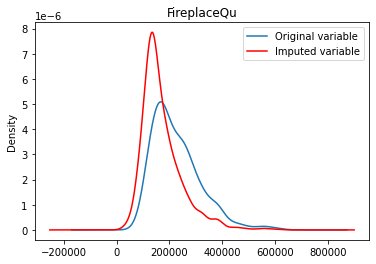

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [77]:
#using sklean imputer

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

imputer.statistics_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array(['Gd', 'TA'], dtype=object)

# missing categery imputation

In [82]:
df = pd.read_csv('train_h.txt',usecols=['GarageQual','FireplaceQu','SalePrice'])
df.isnull().mean()*100


FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

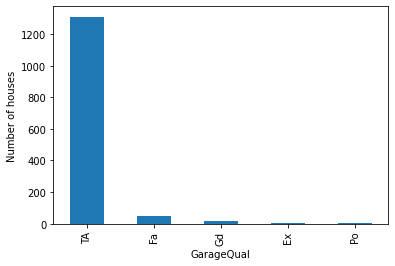

In [83]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

Text(0, 0.5, 'Number of houses')

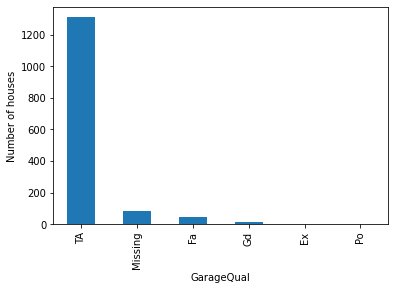

In [84]:
df['GarageQual'].fillna('Missing', inplace=True)


df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [85]:
#using skleanr imputer


from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='constant',fill_value='Missing')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

imputer.statistics_

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array(['Missing', 'Missing'], dtype=object)

# Handling numerical data

# 1. Discreatization/binning(intervals)

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [219]:
df = pd.read_csv('train.txt',usecols=['Age','Fare','Survived'])
df.dropna(inplace=True)
df.shape

(714, 3)

In [220]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [222]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred),np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))


(0.6223776223776224, 0.6331181533646322)

In [223]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

#n_bins=  ?  ----cheak for diffrenrt values
#strategy=uniform/quantile/kmeans
#encode=ordinal(order)/ohe


trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])])

In [230]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)


trf.named_transformers_['first'].bin_edges_,trf.named_transformers_['first'].n_bins_

(array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
               32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
       dtype=object),
 array([15]))

In [225]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]})

output['age_labels'] = pd.cut(x=X_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [227]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)
accuracy_score(y_test,y_pred2),np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

(0.6363636363636364, 0.6330790297339592)

In [228]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

0.6330985915492958


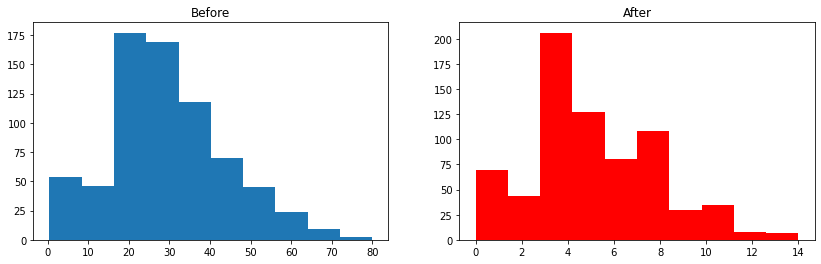

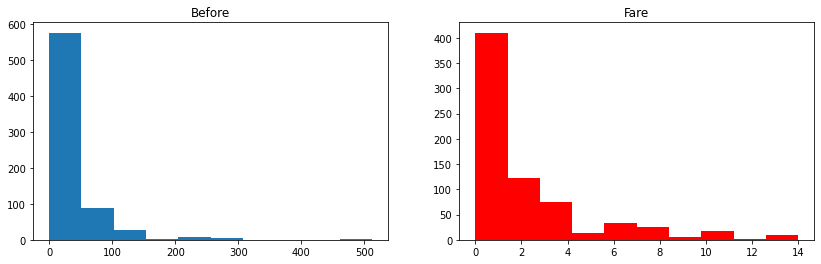

In [234]:
discretize(15,'kmeans')

0.6331572769953052


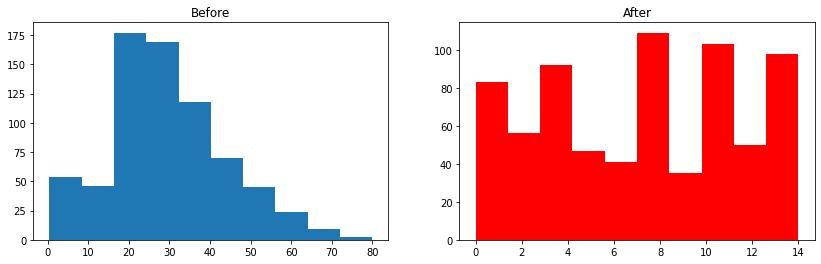

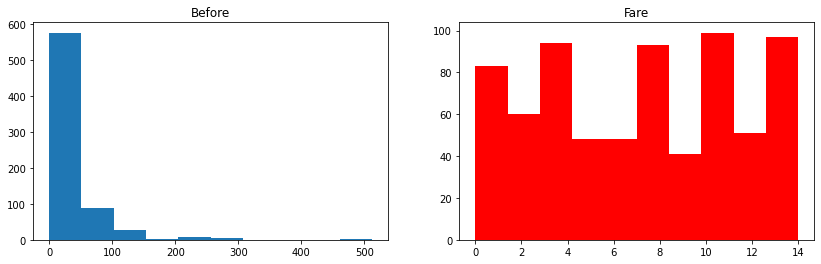

In [235]:
discretize(15,'quantile')

0.6288732394366197


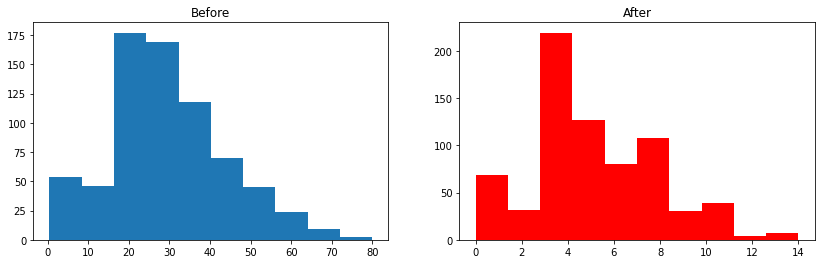

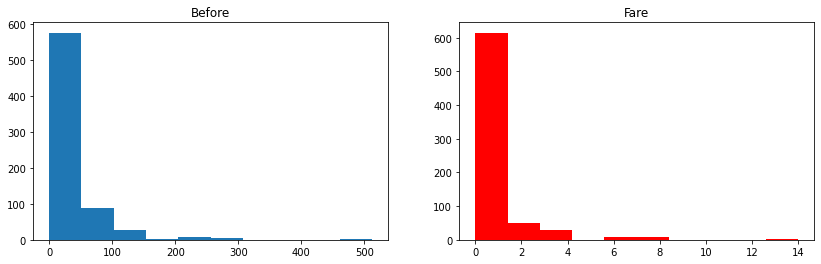

In [236]:
discretize(15,'uniform')

# 2.Binarization

In [264]:
df = pd.read_csv('train.txt')[['Age','Fare','SibSp','Parch','Survived']]
df.dropna(inplace=True)
df.head()


,Age,Fare,SibSp,Parch,Survived
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,1
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0


In [265]:
df['family'] = df['SibSp'] + df['Parch']
df.head()


,Age,Fare,SibSp,Parch,Survived,family
0,22.0,7.2500,1,0,0,1
1,38.0,71.2833,1,0,1,1
2,26.0,7.9250,0,0,1,0
3,35.0,53.1000,1,0,1,1
4,35.0,8.0500,0,0,0,0


In [266]:
df.drop(columns=['SibSp','Parch'],inplace=True)


In [267]:
df.head()

,Age,Fare,Survived,family
0,22.0,7.2500,0,1
1,38.0,71.2833,1,1
2,26.0,7.9250,1,0
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [268]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [269]:
# Without binarization

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred),np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))


(0.6363636363636364, 0.6485719874804381)

In [272]:
# Applying Binarization

from sklearn.preprocessing import Binarizer

trf = ColumnTransformer([('bin',Binarizer(copy=False),['family'])],remainder='passthrough')

#copy=true ----> create new column
#copy=false ----> make changes in existing column

X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)



In [273]:
pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])

,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [274]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

X_trf = trf.fit_transform(X)

accuracy_score(y_test,y_pred2),np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

(0.6223776223776224, 0.6261737089201878)

# Handling categorical data

# categorical ordinal encoding - for input features

In [108]:
df1 = pd.read_csv('customer.txt')
df1=df1.iloc[:,2:]
df1.head()

,review,education,purchased
0,Average,School,No
1,Poor,UG,No
2,Good,PG,No
3,Good,PG,No
4,Average,UG,No


In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1.iloc[:,0:2],df1.iloc[:,-1],test_size=0.3,random_state=0)
                                                                                                                                                 
X_train.shape, X_test.shape

((35, 2), (15, 2))

In [110]:
#cheak preference

df1['review'].value_counts(),df1['education'].value_counts()

(Poor       18
 Good       18
 Average    14
 Name: review, dtype: int64,
 PG        18
 School    16
 UG        16
 Name: education, dtype: int64)

In [111]:
from sklearn.preprocessing import OrdinalEncoder


oe = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])    #give preference here
oe.fit(X_train)


OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [112]:
#apply to train and test data of input features

X_train = oe.transform(X_train)
X_test = oe.transform(X_test)

In [113]:
X_train,oe.categories_


(array([[0., 0.],
        [0., 2.],
        [0., 2.],
        [2., 1.],
        [1., 1.],
        [0., 1.],
        [1., 1.],
        [1., 1.],
        [0., 1.],
        [2., 2.],
        [1., 0.],
        [0., 2.],
        [1., 1.],
        [1., 0.],
        [2., 0.],
        [1., 0.],
        [0., 1.],
        [2., 0.],
        [2., 1.],
        [0., 1.],
        [0., 0.],
        [1., 2.],
        [1., 2.],
        [2., 0.],
        [2., 0.],
        [2., 1.],
        [1., 2.],
        [0., 2.],
        [2., 1.],
        [0., 2.],
        [0., 2.],
        [2., 2.],
        [1., 0.],
        [2., 2.],
        [1., 1.]]),
 [array(['Poor', 'Average', 'Good'], dtype=object),
  array(['School', 'UG', 'PG'], dtype=object)])

# categorical label encoding - for target feature

In [114]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [115]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [116]:
y_train,le.classes_


(array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]),
 array(['No', 'Yes'], dtype=object))

# Categorical nominal encoding- one hot encoding

In [117]:
df = pd.read_csv('cars.txt')
df['owner'].value_counts(),df['fuel'].value_counts()


(First Owner             5289
 Second Owner            2105
 Third Owner              555
 Fourth & Above Owner     174
 Test Drive Car             5
 Name: owner, dtype: int64,
 Diesel    4402
 Petrol    3631
 CNG         57
 LPG         38
 Name: fuel, dtype: int64)

# OneHotEncoding using Sklearn


In [118]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [119]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:4],df.iloc[:,-1],test_size=0.2,random_state=2)

In [120]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)       #drop=first ---due to multicollinearity
                                                     #sparse=False--converts to array automatically(otherwise .toarray())
                                                     #dtype=np.int32---converts datatype to integer
    
X_train_new = ohe.fit_transform(X_train[['fuel','owner']])
X_test_new = ohe.transform(X_test[['fuel','owner']])


#X_train_new = ohe.fit(X_train[['fuel','owner']])                ----fit to train data
#X_train_new = ohe.transform(X_train[['fuel','owner']])           ----transform to train data
#X_test_new = ohe.transform(X_test[['fuel','owner']])             ----transform to test data

In [121]:
X_train_new       # has 2 ohe features ['fuel','owner']

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [122]:
X_train[['brand','km_driven']]                 #---dataframe         #other than ohe feature
X_train[['brand','km_driven']].values           #dataframe convert to --->array


np.hstack((X_train[['brand','km_driven']].values, X_train_new))     # add two array of dataframe

array([['Hyundai', 35000, 1, ..., 0, 0, 0],
       ['Jeep', 60000, 1, ..., 0, 0, 0],
       ['Hyundai', 25000, 0, ..., 0, 0, 0],
       ...,
       ['Tata', 15000, 0, ..., 0, 0, 0],
       ['Maruti', 32500, 1, ..., 1, 0, 0],
       ['Isuzu', 121000, 1, ..., 0, 0, 0]], dtype=object)

In [123]:
#ohe for input features shape

X_train_new.shape ,X_train[['brand','km_driven']].shape,np.hstack((X_train[['brand','km_driven']].values, X_train_new)).shape

((6502, 7), (6502, 2), (6502, 9))

# OneHotEncoding with Top Categories

In [124]:
counts = df['brand'].value_counts()

threshold = 1000    #mean values less than 1000 will be stored in new features

repl=counts[counts <= threshold].index
pd.get_dummies(df['brand'].replace(repl, 'uncommon'))

df['brand'].value_counts(),df['brand'].nunique(),counts[counts <= threshold].index

(Maruti           2448
 Hyundai          1415
 Mahindra          772
 Tata              734
 Toyota            488
 Honda             467
 Ford              397
 Chevrolet         230
 Renault           228
 Volkswagen        186
 BMW               120
 Skoda             105
 Nissan             81
 Jaguar             71
 Volvo              67
 Datsun             65
 Mercedes-Benz      54
 Fiat               47
 Audi               40
 Lexus              34
 Jeep               31
 Mitsubishi         14
 Force               6
 Land                6
 Isuzu               5
 Kia                 4
 Ambassador          4
 Daewoo              3
 MG                  3
 Ashok               1
 Opel                1
 Peugeot             1
 Name: brand, dtype: int64,
 32,
 Index(['Mahindra', 'Tata', 'Toyota', 'Honda', 'Ford', 'Chevrolet', 'Renault',
        'Volkswagen', 'BMW', 'Skoda', 'Nissan', 'Jaguar', 'Volvo', 'Datsun',
        'Mercedes-Benz', 'Fiat', 'Audi', 'Lexus', 'Jeep', 'Mitsubishi', 'Fo

In [125]:
pd.get_dummies(df['brand'].replace(repl, 'uncommon')).head(2)   #values less than others get stored in uncommon feature


,Hyundai,Maruti,uncommon
0,0,1,0
1,0,0,1


#  OneHotEncoding using Pandas

In [126]:
pd.get_dummies(df,columns=['fuel','owner'])   # fuel- 4col  and owner-5 cols====9

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,0,1,0,0,1,0,0,0,0
1,Skoda,120000,370000,0,1,0,0,0,0,1,0,0
2,Honda,140000,158000,0,0,0,1,0,0,0,0,1
3,Hyundai,127000,225000,0,1,0,0,1,0,0,0,0
4,Maruti,120000,130000,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,0,1,1,0,0,0,0
8124,Hyundai,119000,135000,0,1,0,0,0,1,0,0,0
8125,Maruti,120000,382000,0,1,0,0,1,0,0,0,0
8126,Tata,25000,290000,0,1,0,0,1,0,0,0,0


# K-1 OneHotEncoding

In [127]:
pd.get_dummies(df,columns=['fuel','owner'],drop_first=True).head()  #total 7  cols


,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,1,0,0,0,0,0,0
1,Skoda,120000,370000,1,0,0,0,1,0,0
2,Honda,140000,158000,0,0,1,0,0,0,1
3,Hyundai,127000,225000,1,0,0,0,0,0,0
4,Maruti,120000,130000,0,0,1,0,0,0,0


# Handling mixed data

In [276]:
df = pd.read_csv('titanic.txt')
df

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0
...,...,...,...,...
886,NaN,211536,3,0
887,B42,112053,3,1
888,NaN,W./C. 6607,1,0
889,C148,111369,2,1


In [277]:
df['number'].unique(),


array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'Passengers travelling with')

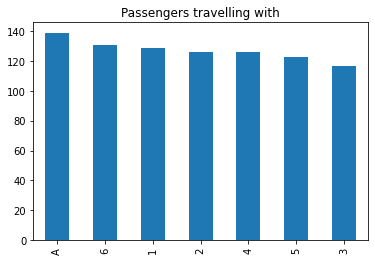

In [278]:
fig = df['number'].value_counts().plot.bar()
fig.set_title('Passengers travelling with')

In [279]:
# extract numerical part
df['number_numerical'] = pd.to_numeric(df["number"],errors='coerce',downcast='integer')
# extract categorical part
df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['number'],np.nan)

df.head()

#we can replace number_numerical	NaN WITH 0

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [281]:
df['Cabin'].unique(),df['Ticket'].unique()



(array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
        'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
        'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
        'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
        'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
        'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
        'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
        'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
        'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
        'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
        'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
        'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
        'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
        'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
   

In [285]:
df['cabin_num'] = df['Cabin'].str.extract('(\d+)') # captures numerical part ---BY regex \d+
df['cabin_cat'] = df['Cabin'].str[0] # captures the first letter

df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


(C    59
 B    47
 D    33
 E    32
 A    15
 F    13
 G     4
 T     1
 Name: cabin_cat, dtype: int64,
 <AxesSubplot:>)

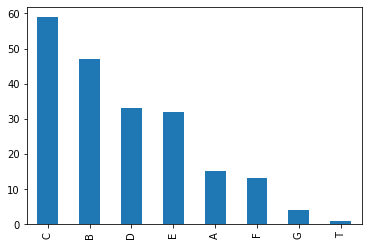

In [287]:
df['cabin_cat'].value_counts(),df['cabin_cat'].value_counts().plot(kind='bar')



In [288]:
# extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'], errors='coerce', downcast='integer')

# extract the first part of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan, df['ticket_cat'])

df.head(20)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
5,NaN,330877,2,0,2.0,NaN,NaN,NaN,330877.0,NaN
6,E46,17463,2,0,2.0,NaN,46,E,17463.0,NaN
7,NaN,349909,5,0,5.0,NaN,NaN,NaN,349909.0,NaN
8,NaN,347742,1,1,1.0,NaN,NaN,NaN,347742.0,NaN
9,NaN,237736,A,1,NaN,A,NaN,NaN,237736.0,NaN


In [289]:
df['ticket_cat'].unique()


array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

# Handling date and time variables

In [290]:
date = pd.read_csv('orders.txt')
time = pd.read_csv('messages.txt')

In [293]:
date.head()


,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3


In [294]:
time.head()


,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше


In [295]:
date.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   product_id  1000 non-null   int64 
 2   city_id     1000 non-null   int64 
 3   orders      1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [296]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [297]:
# Converting to datetime datatype
date['date'] = pd.to_datetime(date['date'])
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1000 non-null   datetime64[ns]
 1   product_id  1000 non-null   int64         
 2   city_id     1000 non-null   int64         
 3   orders      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB


In [304]:
date['date_year'] = date['date'].dt.year                                 # Extract year
date['date_month_no'] = date['date'].dt.month                            # Extract Month
date['date_month_name'] = date['date'].dt.month_name()                   # month name
date['date_day'] = date['date'].dt.day                                   #Extract Days
date['date_dow'] = date['date'].dt.dayofweek                             # day of week
date['date_dow_name'] = date['date'].dt.day_name()                       # day of week - name
date['date_is_weekend'] = np.where(date['date_dow_name'].isin(['Sunday', 'Saturday']), 1,0) # is weekend?
date['date_week'] = date['date'].dt.week                                 #Extract week of the year
date['quarter'] = date['date'].dt.quarter                                #Extract Quarter
date['semester'] = np.where(date['quarter'].isin([1,2]), 1, 2)           #Extract Semester

date.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_3136\1353361537.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  date['date_week'] = date['date'].dt.week                                 #Extract week of the year


,date,product_id,city_id,orders,date_year,date_month_no,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend,date_week,quarter,semester
0,2019-12-10,5628,25,3,2019,12,December,10,1,Tuesday,0,50,4,2
1,2018-08-15,3646,14,157,2018,8,August,15,2,Wednesday,0,33,3,2
2,2018-10-23,1859,25,1,2018,10,October,23,1,Tuesday,0,43,4,2
3,2019-08-17,7292,25,1,2019,8,August,17,5,Saturday,1,33,3,2
4,2019-01-06,4344,25,3,2019,1,January,6,6,Sunday,1,1,1,1


In [305]:
import datetime

today = datetime.datetime.today()

today

datetime.datetime(2022, 10, 19, 1, 5, 20, 573990)

In [306]:
today - date['date']

0     1044 days 01:05:20.573990
1     1526 days 01:05:20.573990
2     1457 days 01:05:20.573990
3     1159 days 01:05:20.573990
4     1382 days 01:05:20.573990
                 ...           
995   1472 days 01:05:20.573990
996   1413 days 01:05:20.573990
997   1261 days 01:05:20.573990
998   1326 days 01:05:20.573990
999   1100 days 01:05:20.573990
Name: date, Length: 1000, dtype: timedelta64[ns]

In [307]:
(today - date['date']).dt.days


0      1044
1      1526
2      1457
3      1159
4      1382
       ... 
995    1472
996    1413
997    1261
998    1326
999    1100
Name: date, Length: 1000, dtype: int64

In [308]:
np.round((today -date['date']) / np.timedelta64(1, 'M'),0)  # Months passed


0      34.0
1      50.0
2      48.0
3      38.0
4      45.0
       ... 
995    48.0
996    46.0
997    41.0
998    44.0
999    36.0
Name: date, Length: 1000, dtype: float64

In [309]:
date.head()

,date,product_id,city_id,orders,date_year,date_month_no,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend,date_week,quarter,semester
0,2019-12-10,5628,25,3,2019,12,December,10,1,Tuesday,0,50,4,2
1,2018-08-15,3646,14,157,2018,8,August,15,2,Wednesday,0,33,3,2
2,2018-10-23,1859,25,1,2018,10,October,23,1,Tuesday,0,43,4,2
3,2019-08-17,7292,25,1,2019,8,August,17,5,Saturday,1,33,3,2
4,2019-01-06,4344,25,3,2019,1,January,6,6,Sunday,1,1,1,1


In [310]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [311]:
# Converting to datetime datatype
time['date'] = pd.to_datetime(time['date'])
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1000 non-null   datetime64[ns]
 1   msg     1000 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 15.8+ KB


In [313]:
time['hour'] = time['date'].dt.hour
time['min'] = time['date'].dt.minute
time['sec'] = time['date'].dt.second

time['time'] = time['date'].dt.time    #Extract Time part

time.head()


,date,msg,hour,min,sec,time
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0,00:50:00
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0,23:40:00
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0,00:21:00
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0,00:31:00
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0,23:11:00


In [314]:
#Time difference
today - time['date']

0     3230 days 00:15:20.573990
1     3094 days 01:25:20.573990
2     3580 days 00:44:20.573990
3     2882 days 00:34:20.573990
4     3279 days 01:54:20.573990
                 ...           
995   3869 days 00:15:20.573990
996   3190 days 01:51:20.573990
997   3655 days 01:28:20.573990
998   3771 days 01:31:20.573990
999   3043 days 01:40:20.573990
Name: date, Length: 1000, dtype: timedelta64[ns]

In [317]:
(today - time['date'])/np.timedelta64(1,'s'),(today - time['date'])/np.timedelta64(1,'m'),(today - time['date'])/np.timedelta64(1,'h') 
 
#seconds,minutes,hours

(0      2.790729e+08
 1      2.673267e+08
 2      3.093147e+08
 3      2.490069e+08
 4      2.833125e+08
            ...     
 995    3.342825e+08
 996    2.756227e+08
 997    3.157973e+08
 998    3.258199e+08
 999    2.629212e+08
 Name: date, Length: 1000, dtype: float64,
 0      4.651215e+06
 1      4.455445e+06
 2      5.155244e+06
 3      4.150114e+06
 4      4.721874e+06
            ...     
 995    5.571375e+06
 996    4.593711e+06
 997    5.263288e+06
 998    5.430331e+06
 999    4.382020e+06
 Name: date, Length: 1000, dtype: float64,
 0      77520.255715
 1      74257.422382
 2      85920.739048
 3      69168.572382
 4      78697.905715
            ...     
 995    92856.255715
 996    76561.855715
 997    87721.472382
 998    90505.522382
 999    73033.672382
 Name: date, Length: 1000, dtype: float64)

# Outliers

# 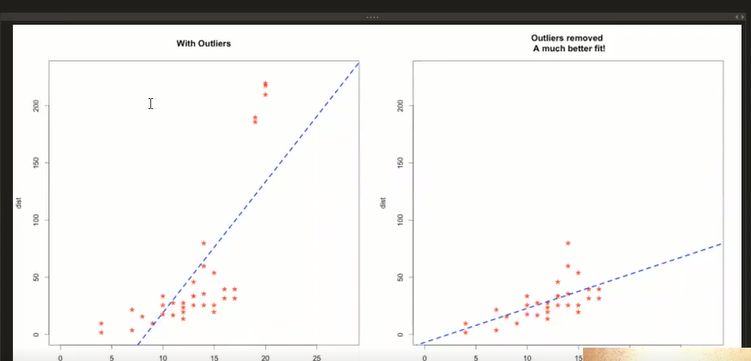

# outlier-removal-using-zscore -- for normal distribution

# 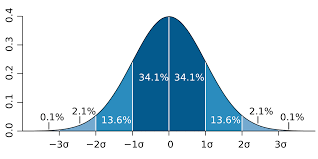

In [6]:
df = pd.read_csv('placement.txt')
df.head(2)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


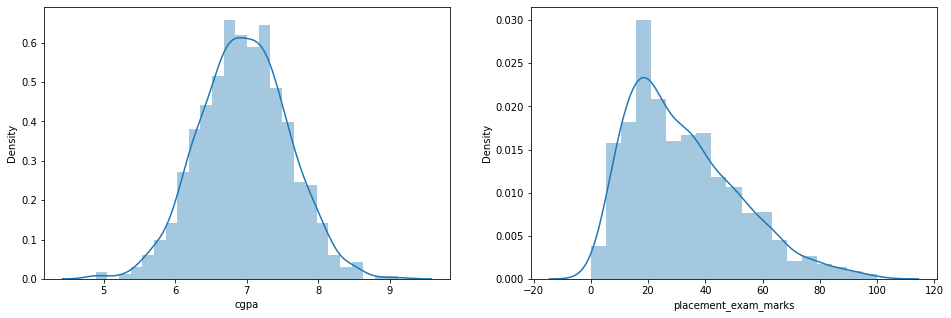

In [7]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

#we will use here cgpa

In [9]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12


# Trimming

# method 1

In [10]:
# Finding the boundary values

print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [11]:
# Finding the outliers

df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [12]:
# Trimming

new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


# method 2

In [13]:
# Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [14]:
df[df['cgpa_zscore'] > 3],df[df['cgpa_zscore'] < -3],df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

(     cgpa  placement_exam_marks  placed  cgpa_zscore
 995  8.87                  44.0       1     3.099150
 996  9.12                  65.0       1     3.505062,
      cgpa  placement_exam_marks  placed  cgpa_zscore
 485  4.92                  44.0       1    -3.314251
 997  4.89                  34.0       0    -3.362960
 999  4.90                  10.0       1    -3.346724,
      cgpa  placement_exam_marks  placed  cgpa_zscore
 485  4.92                  44.0       1    -3.314251
 995  8.87                  44.0       1     3.099150
 996  9.12                  65.0       1     3.505062
 997  4.89                  34.0       0    -3.362960
 999  4.90                  10.0       1    -3.346724)

In [18]:
# Trimming 
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]
new_df,new_df.drop('cgpa_zscore',axis=1)

(     cgpa  placement_exam_marks  placed  cgpa_zscore
 0    7.19                  26.0       1     0.371425
 1    7.46                  38.0       1     0.809810
 2    7.54                  40.0       1     0.939701
 3    6.42                   8.0       1    -0.878782
 4    7.23                  17.0       0     0.436371
 ..    ...                   ...     ...          ...
 991  7.04                  57.0       0     0.127878
 992  6.26                  12.0       0    -1.138565
 993  6.73                  21.0       1    -0.375452
 994  6.48                  63.0       0    -0.781363
 998  8.62                  46.0       1     2.693239
 
 [995 rows x 4 columns],
      cgpa  placement_exam_marks  placed
 0    7.19                  26.0       1
 1    7.46                  38.0       1
 2    7.54                  40.0       1
 3    6.42                   8.0       1
 4    7.23                  17.0       0
 ..    ...                   ...     ...
 991  7.04                  57.0      

# Capping

In [19]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()
lower_limit

5.113546374602832

In [24]:
df['cgpa'] = np.where( df['cgpa']>upper_limit, upper_limit,         #x--if 1 st condition true then upper limit
                      np.where( df['cgpa']<lower_limit,lower_limit, #y-if 1st condition false then this cond is true
                               df['cgpa'] ))                        #z--if 1st and 2nd cond false then   this works
#np.where(x,y,z)

In [25]:
df.shape,df['cgpa'].describe()



((1000, 4),
 count    1000.000000
 mean        6.961499
 std         0.612688
 min         5.113546
 25%         6.550000
 50%         6.960000
 75%         7.370000
 max         8.808934
 Name: cgpa, dtype: float64)

# outlier-removal-using-iqr-method -for left/right skewed data

# 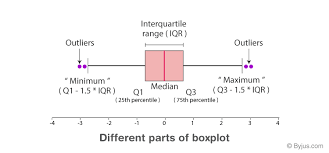

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


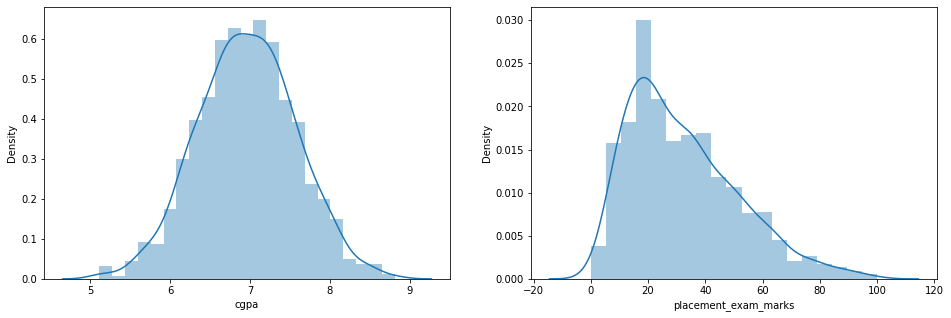

In [26]:
#we will use placement exam marks

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [29]:
df['cgpa'].skew(),df['placement_exam_marks'].skew()   #  to cheak skewness

(-0.003704380991302917, 0.8356419499466834)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

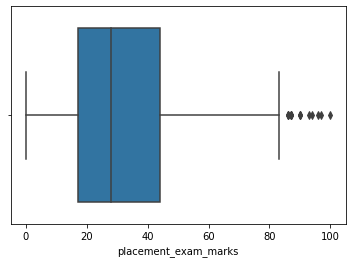

In [30]:
sns.boxplot(df['placement_exam_marks'])


In [31]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


In [32]:
#Finding Outliers

df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed,cgpa_zscore
9,7.75,94.0,1,1.280667
40,6.60,86.0,1,-0.586526
61,7.51,86.0,0,0.890992
134,6.33,93.0,0,-1.024910
162,7.80,90.0,0,1.361849
283,7.09,87.0,0,0.209061
290,8.38,87.0,0,2.303564
311,6.97,87.0,1,0.014223
324,6.64,90.0,0,-0.521580
630,6.56,96.0,1,-0.651472


In [33]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed,cgpa_zscore


# Trimming

In [34]:
new_df = df[df['placement_exam_marks'] < upper_limit]
new_df.shape

(985, 4)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level fun

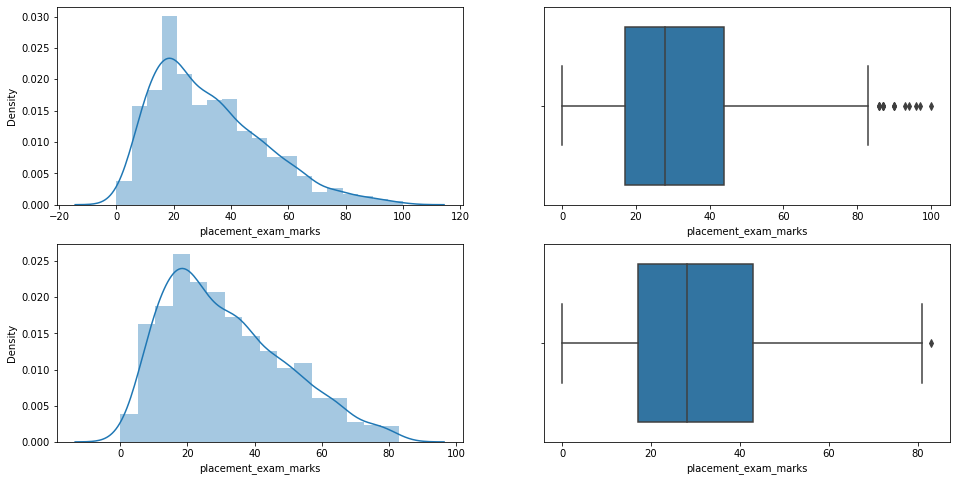

In [35]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

# Capping

In [38]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where( new_df_cap['placement_exam_marks'] > upper_limit, upper_limit,
                                     np.where(  new_df_cap['placement_exam_marks'] < lower_limit,lower_limit,
                                      new_df_cap['placement_exam_marks'] ))

#np.where(condtion,true,false)

new_df_cap.shape

(1000, 4)

In [39]:
new_df_cap.shape

(1000, 4)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level fun

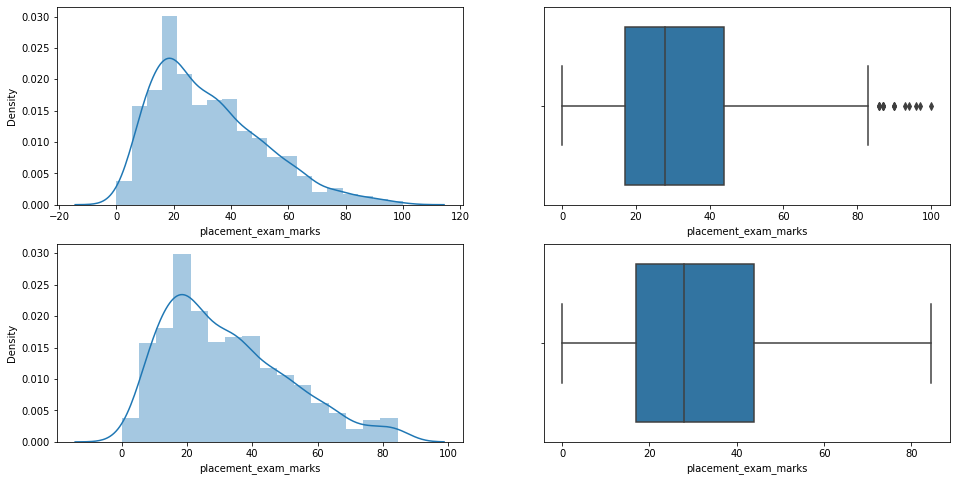

In [40]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])
plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()


# outlier-detection-using-percentiles

In [44]:
df = pd.read_csv('weight-height.txt')
df.head(),df.shape,df['Height'].describe()

(  Gender     Height      Weight
 0   Male  73.847017  241.893563
 1   Male  68.781904  162.310473
 2   Male  74.110105  212.740856
 3   Male  71.730978  220.042470
 4   Male  69.881796  206.349801,
 (10000, 3),
 count    10000.000000
 mean        66.367560
 std          3.847528
 min         54.263133
 25%         63.505620
 50%         66.318070
 75%         69.174262
 max         78.998742
 Name: Height, dtype: float64)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

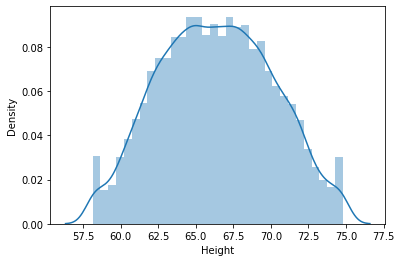

In [60]:
sns.distplot(df['Height'])

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

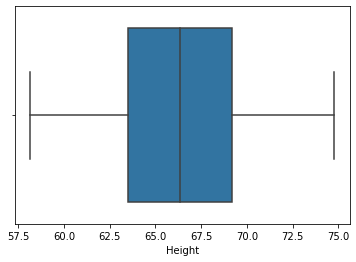

In [61]:
sns.boxplot(df['Height'])

In [62]:
upper_limit = df['Height'].quantile(0.99)      #note-if upper is 0.95 then lower should be 0.05
lower_limit = df['Height'].quantile(0.01)              #if upper is 0.90 then lower should be 0.10


upper_limit,lower_limit

(74.78571507648495, 58.134495462372655)

In [63]:
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]

In [64]:
df['Height'].describe(),new_df['Height'].describe()


(count    10000.000000
 mean        66.366281
 std          3.795717
 min         58.134412
 25%         63.505620
 50%         66.318070
 75%         69.174262
 max         74.785790
 Name: Height, dtype: float64,
 count    9899.000000
 mean       66.280376
 std         3.718031
 min        58.134412
 25%        63.472470
 50%        66.263684
 75%        69.083828
 max        74.767447
 Name: Height, dtype: float64)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

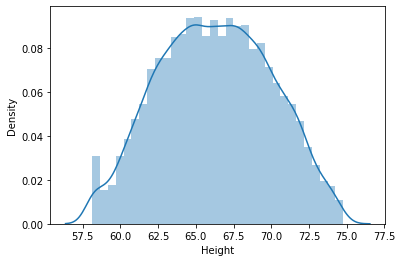

In [65]:
sns.distplot(new_df['Height'])


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

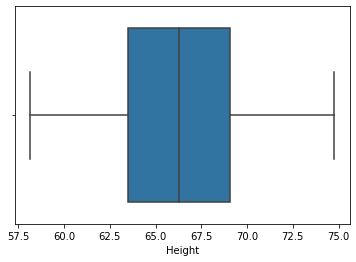

In [66]:
sns.boxplot(new_df['Height'])


# Capping --> Winsorization(in percentile method)

In [54]:
df['Height'] = np.where(df['Height'] >= upper_limit, upper_limit,
               np.where(df['Height'] <= lower_limit,lower_limit,
               df['Height']))

In [56]:
df.shape,df['Height'].describe()

((10000, 3),
 count    10000.000000
 mean        66.366281
 std          3.795717
 min         58.134412
 25%         63.505620
 50%         66.318070
 75%         69.174262
 max         74.785790
 Name: Height, dtype: float64)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

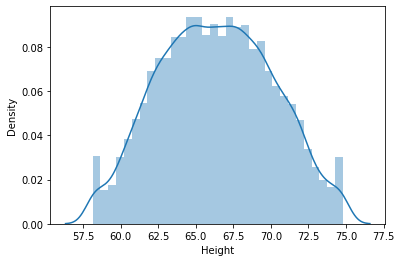

In [57]:
sns.distplot(df['Height'])


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

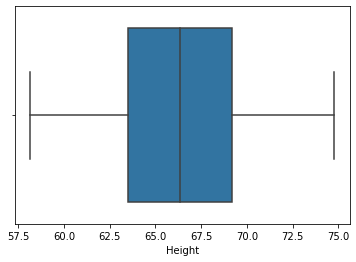

In [58]:
sns.boxplot(df['Height'])


# Feature scaling

why do we ned feature scaling?

# 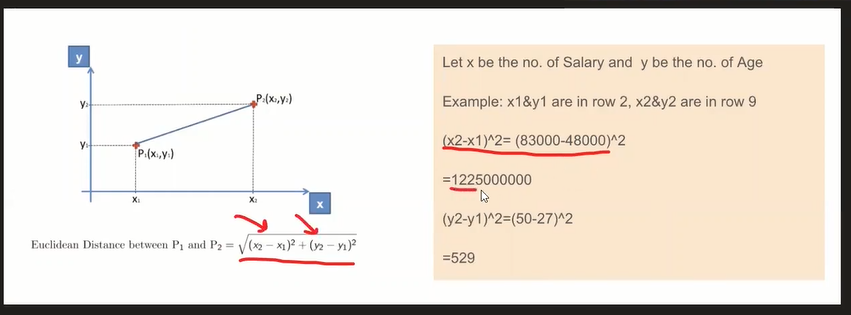

# 1. standardization/z score normalization


# 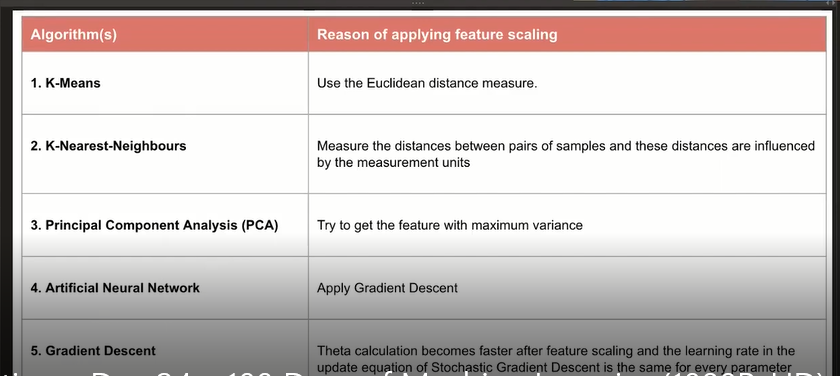

In [128]:
df = pd.read_csv("Social_Network_Ads.txt")

df=df.iloc[:,2:]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


Train test split

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),df['Purchased'],test_size=0.3,random_state=0)
                                                                                                                                                 
X_train.shape, X_test.shape

((280, 2), (120, 2))

# StandardScaler

In [130]:
#geanerally after train test split do standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set only , it will learn the parameters
scaler.fit(X_train)

# transform train and test sets both

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [131]:
scaler.mean_,X_train,X_train_scaled

#X_train----in dataframe
#X_train_scaled----in numpy array----->need to convert numpy array to dataframe


(array([3.78642857e+01, 6.98071429e+04]),
      Age  EstimatedSalary
 92    26            15000
 223   60           102000
 234   38           112000
 232   40           107000
 377   42            53000
 ..   ...              ...
 323   48            30000
 192   29            43000
 117   36            52000
 47    27            54000
 172   26           118000
 
 [280 rows x 2 columns],
 array([[-1.1631724 , -1.5849703 ],
        [ 2.17018137,  0.93098672],
        [ 0.0133054 ,  1.22017719],
        [ 0.20938504,  1.07558195],
        [ 0.40546467, -0.48604654],
        [-0.28081405, -0.31253226],
        [ 0.99370357, -0.8330751 ],
        [ 0.99370357,  1.8563962 ],
        [ 0.0133054 ,  1.24909623],
        [-0.86905295,  2.26126285],
        [-1.1631724 , -1.5849703 ],
        [ 2.17018137, -0.80415605],
        [-1.35925203, -1.46929411],
        [ 0.40546467,  2.2901819 ],
        [ 0.79762394,  0.75747245],
        [-0.96709276, -0.31253226],
        [ 0.11134522,  0.757472

In [132]:
#convert numpy array to dataframe 

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [133]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [134]:
np.round(X_train_scaled.describe())  # mean=0 and sd =1 after scaling

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


# Effect of Scaling

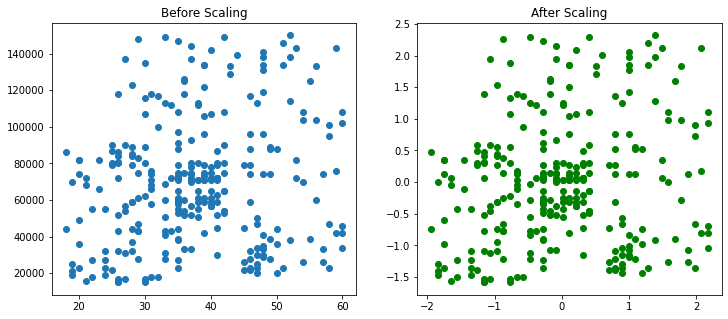

In [135]:
#  mean centering and scaling standard deviation

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Before Scaling")
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])

ax2.set_title("After Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='green')

plt.show()

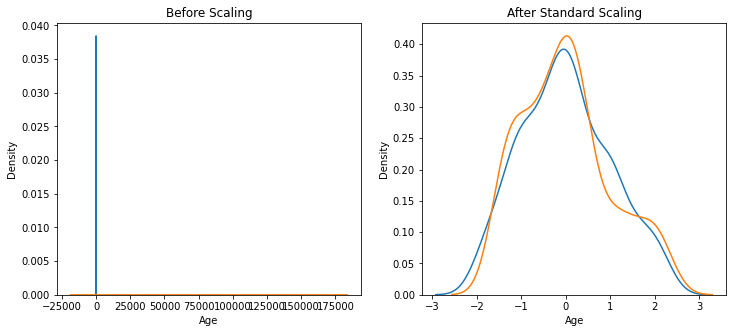

In [136]:
#pdf curve

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

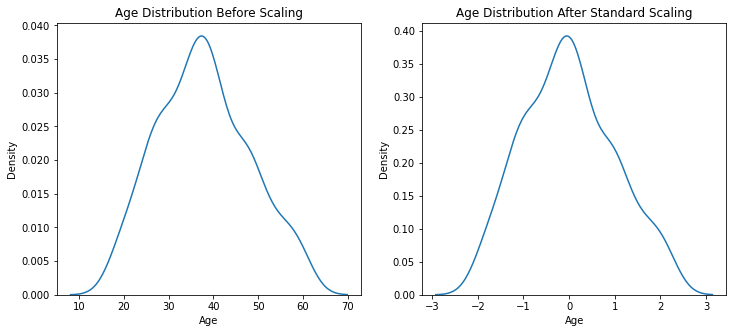

In [137]:
#Comparison of Distributions

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

# 2. Normalization

In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),df['Purchased'],test_size=0.3,random_state=0)
                                                                                                                                                 
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [139]:
from sklearn.preprocessing import MinMaxScaler

scaler_mm = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler_mm.fit(X_train)

# transform train and test sets
X_train_scaled_mm = scaler_mm.transform(X_train)
X_test_scaled_mm = scaler_mm.transform(X_test)

In [140]:
X_train_scaled_mm

array([[0.19047619, 0.        ],
       [1.        , 0.64444444],
       [0.47619048, 0.71851852],
       [0.52380952, 0.68148148],
       [0.57142857, 0.28148148],
       [0.4047619 , 0.32592593],
       [0.71428571, 0.19259259],
       [0.71428571, 0.88148148],
       [0.47619048, 0.72592593],
       [0.26190476, 0.98518519],
       [0.19047619, 0.        ],
       [1.        , 0.2       ],
       [0.14285714, 0.02962963],
       [0.57142857, 0.99259259],
       [0.66666667, 0.6       ],
       [0.23809524, 0.32592593],
       [0.5       , 0.6       ],
       [0.23809524, 0.54814815],
       [0.54761905, 0.42222222],
       [0.64285714, 0.08148148],
       [0.35714286, 0.4       ],
       [0.04761905, 0.4962963 ],
       [0.30952381, 0.43703704],
       [0.57142857, 0.48148148],
       [0.4047619 , 0.42222222],
       [0.35714286, 0.99259259],
       [0.52380952, 0.41481481],
       [0.78571429, 0.97037037],
       [0.66666667, 0.47407407],
       [0.4047619 , 0.44444444],
       [0.

In [141]:
X_train_scaled_mm = pd.DataFrame(X_train_scaled_mm, columns=X_train.columns)
X_test_scaled_mm = pd.DataFrame(X_test_scaled_mm, columns=X_test.columns)

In [142]:
X_train_scaled_mm

,Age,EstimatedSalary
0,0.190476,0.000000
1,1.000000,0.644444
2,0.476190,0.718519
3,0.523810,0.681481
4,0.571429,0.281481
...,...,...
275,0.714286,0.111111
276,0.261905,0.207407
277,0.428571,0.274074
278,0.214286,0.288889


In [143]:
np.round(X_train.describe(), 1),np.round(X_train_scaled_mm.describe(), 1)



(         Age  EstimatedSalary
 count  280.0            280.0
 mean    37.9          69807.1
 std     10.2          34641.2
 min     18.0          15000.0
 25%     30.0          43000.0
 50%     37.0          70500.0
 75%     46.0          88000.0
 max     60.0         150000.0,
          Age  EstimatedSalary
 count  280.0            280.0
 mean     0.5              0.4
 std      0.2              0.3
 min      0.0              0.0
 25%      0.3              0.2
 50%      0.5              0.4
 75%      0.7              0.5
 max      1.0              1.0)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

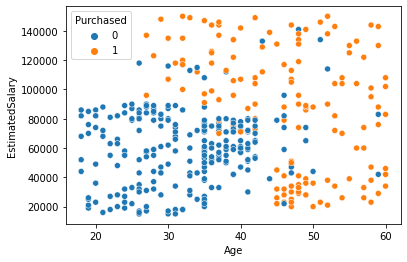

In [144]:
sns.scatterplot(df['Age'],df['EstimatedSalary'],hue=df['Purchased'])

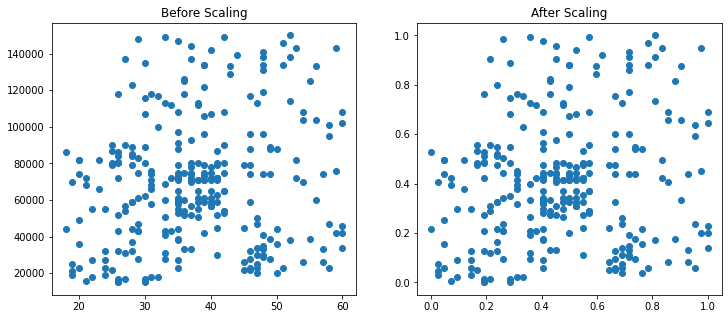

In [145]:
fig, (ax3, ax4) = plt.subplots(ncols=2, figsize=(12, 5))

ax3.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax3.set_title("Before Scaling")
ax4.scatter(X_train_scaled_mm['Age'], X_train_scaled_mm['EstimatedSalary'])
ax4.set_title("After Scaling")
plt.show()


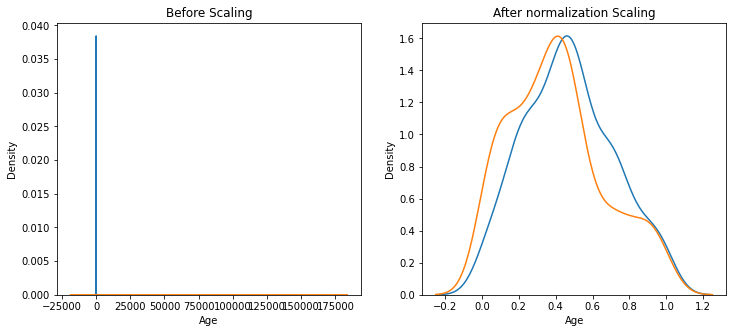

In [146]:
#pdf plot

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After normalization Scaling')
sns.kdeplot(X_train_scaled_mm['Age'], ax=ax2)
sns.kdeplot(X_train_scaled_mm['EstimatedSalary'], ax=ax2)
plt.show()

# Mathematical transformations

In [ ]:
# how to cheak data is normally distributed or not?

# method 1
import seaborn as sns
sns.distplot(df['Age'])

#method 2
#pd.skew() --------=0 then normally distributed

method 3-  qq plot   (mostly used)

# 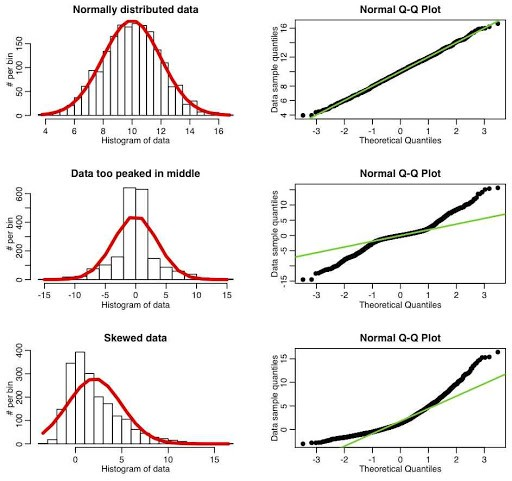

# func transformer -log transform

In [159]:
df = pd.read_csv('train.txt',usecols=['Age','Fare','Survived'])
df.isnull().sum()
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.head(2)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833


In [160]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


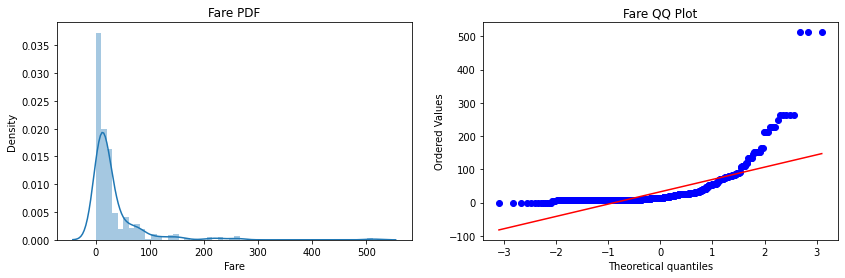

In [162]:
#ploting pdf
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')


#ploting qq plot
plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [177]:
print('without log transformation--Accuracy LR 0.6480446927374302')

trf = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

#if there are zeros then use np.log1p  and no zeros in x then u can use np.logp

X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_transformed,y_train)    
y_pred = clf.predict(X_test_transformed)    
print("Accuracy LR",accuracy_score(y_test,y_pred))

X_transformed = trf.fit_transform(X)
clf = LogisticRegression()
print("cross val accuracy LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
 
    

without log transformation--Accuracy LR 0.6480446927374302
Accuracy LR 0.6703910614525139
cross val accuracy LR 0.6712609238451936


In [185]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
   
    X_trans = trf.fit_transform(X)
    clf = LogisticRegression()
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))  
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6442446941323345


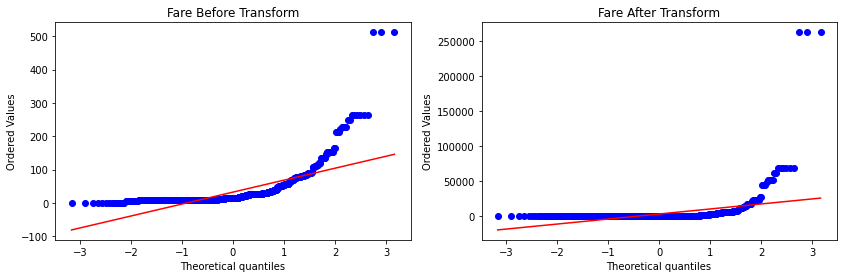

Accuracy 0.39843945068664166


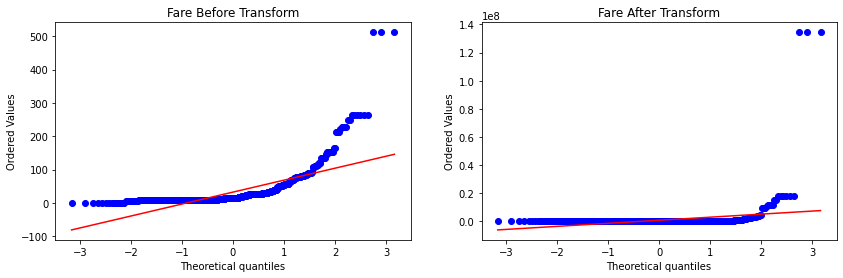

Accuracy 0.6589013732833957


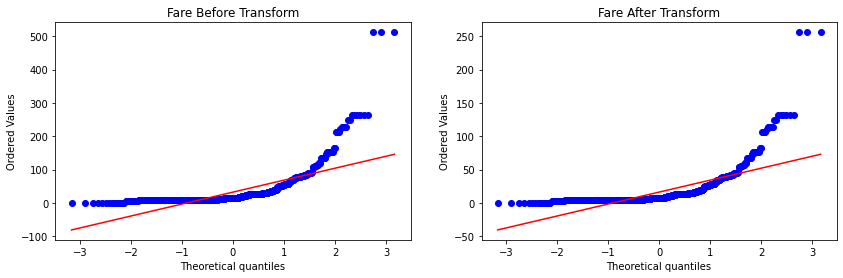

Accuracy 0.61729088639201


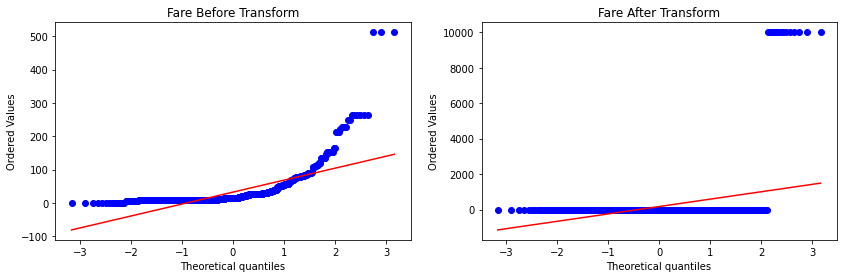

(None, None, None, None)

In [187]:
apply_transform(lambda x:x**2),apply_transform(lambda x:x**3),apply_transform(lambda x:x/2),apply_transform(lambda x:1/(x+0.0001))

# power transformation

# 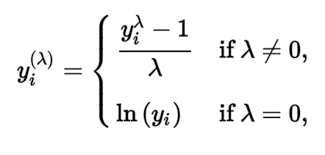


# 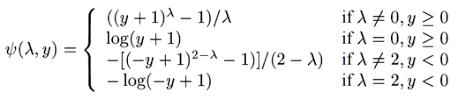

In [196]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


from sklearn.preprocessing import PowerTransformer

In [197]:
df = pd.read_csv('concrete_data.txt')
df.head(2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89


In [198]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [199]:
#to apply box-cox -no negetive values and zeros be in data 
#but here are present

df.describe()      


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [200]:
X = df.drop(columns=['Strength'])
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [201]:
# Applying Regression without any transformation

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.6275531792314848

In [202]:
# Cross checking with cross val score

lr = LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2'))

0.4609940491662864

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


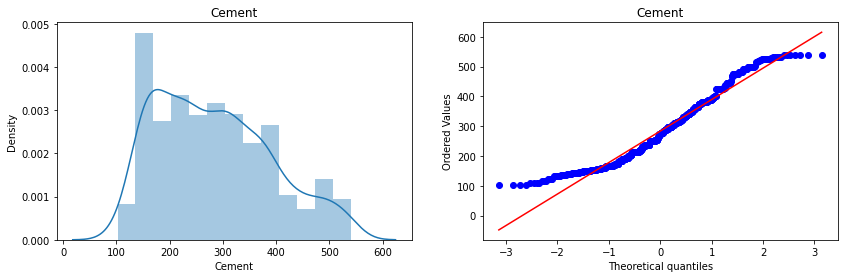

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


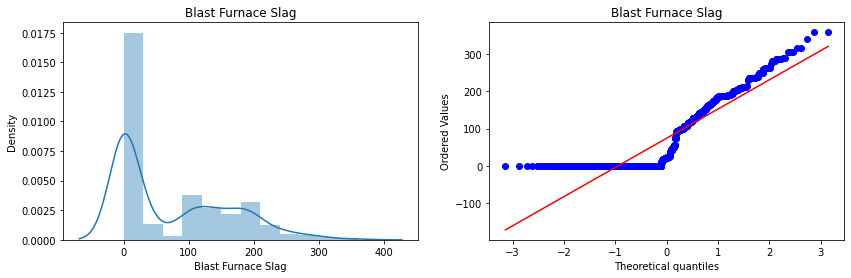

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


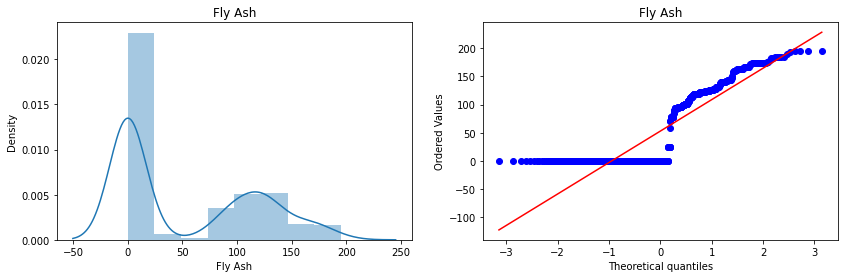

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


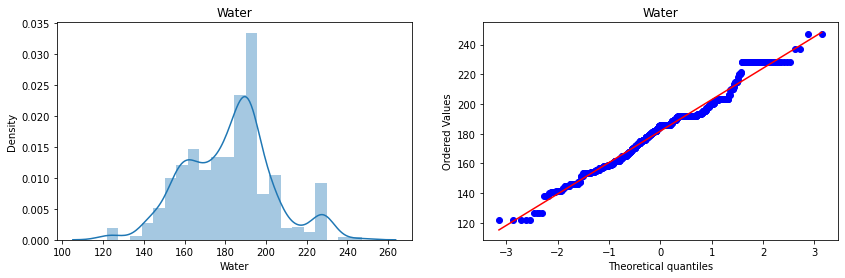

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


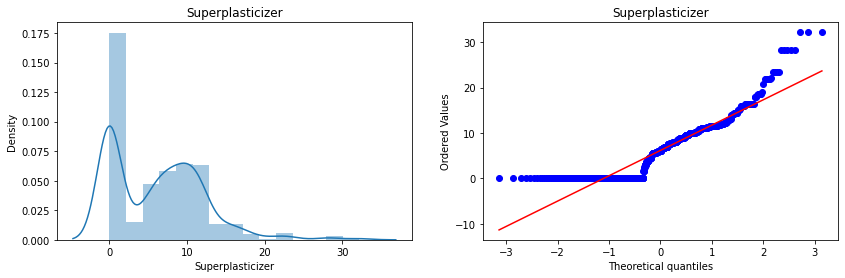

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


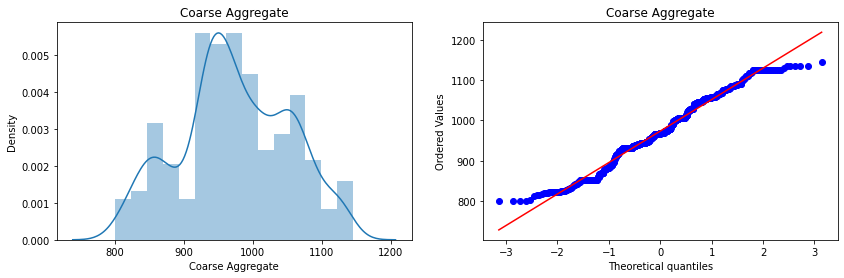

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


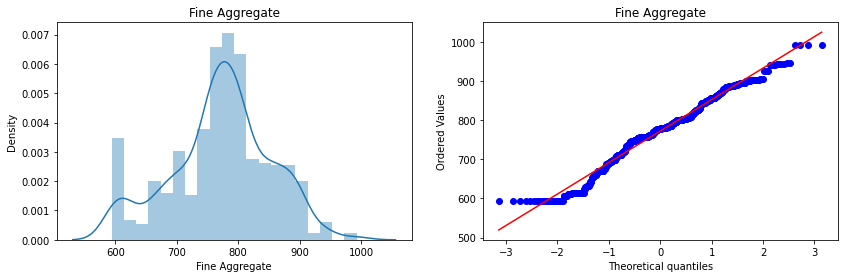

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


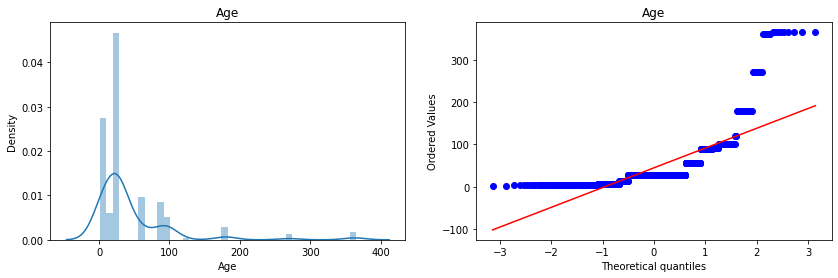

In [203]:
# Plotting the distplots without any transformation

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

# Applying Box-Cox Transform---------require only positive data(no zeros and negetive no )

In [208]:

#here default=true,so automaticalyy stamdardization happens to it

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)  #to remove zeros,we added this +0.000001
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})  

#pt.lambdas_---here for each n no  feature one n lambda created

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782019
7,Age,0.066631


In [209]:
# Applying linear regression on transformed data

lr = LinearRegression()
lr.fit(X_train_transformed,y_train)

y_pred2 = lr.predict(X_test_transformed)

r2_score(y_test,y_pred2)
0.8047825006181187
# Using cross val score

pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.665853794221986

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


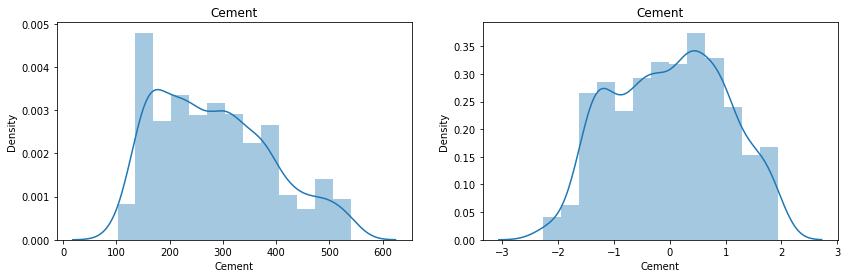

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


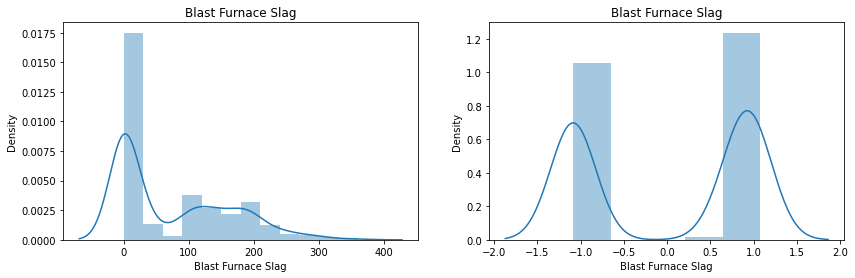

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


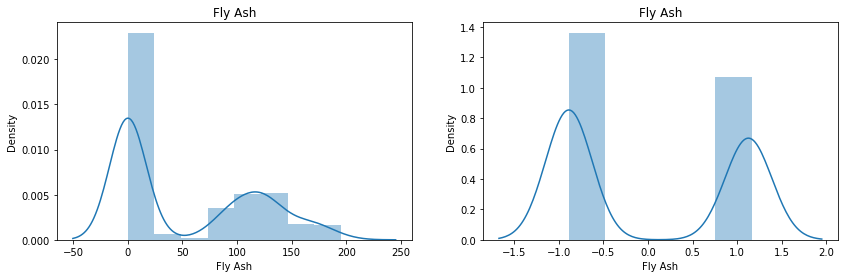

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


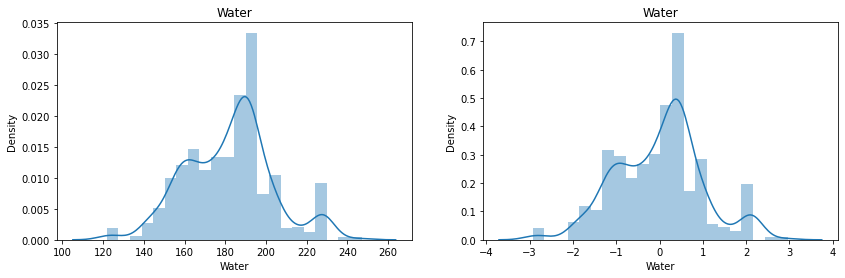

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


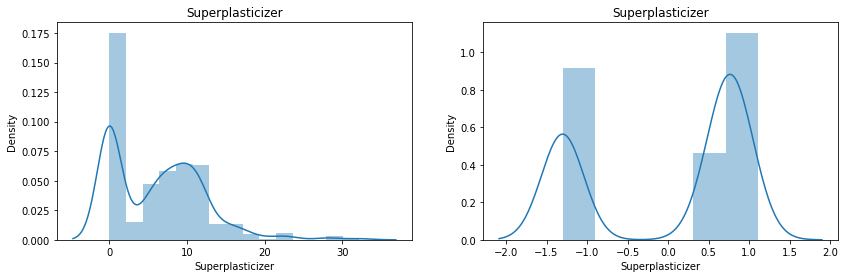

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


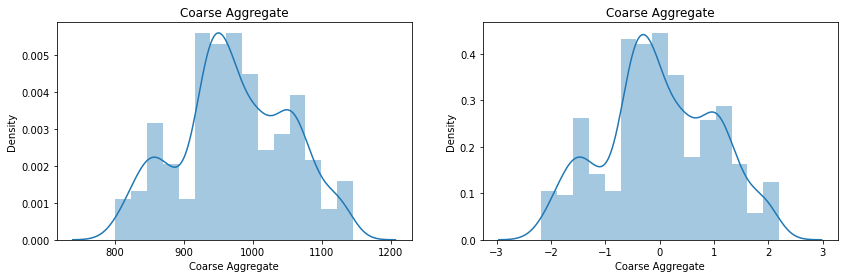

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


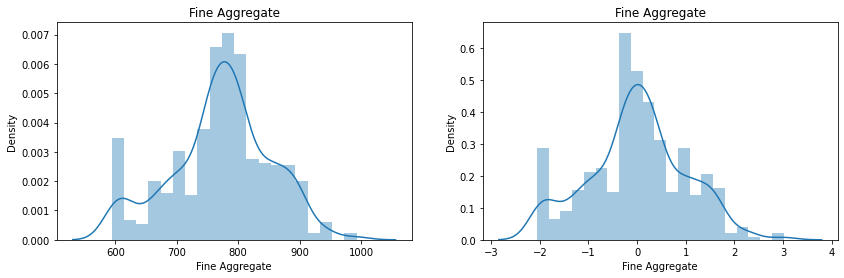

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


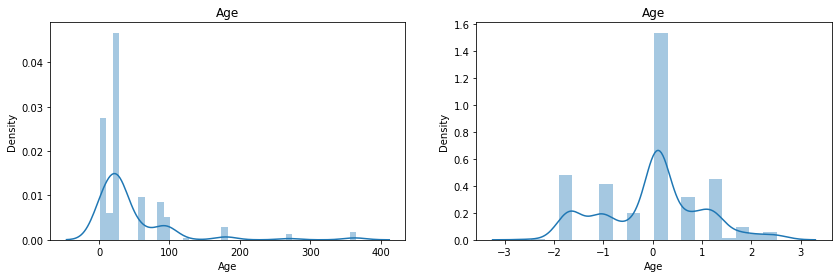

In [206]:
# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)

    plt.show()

# Apply Yeo-Johnson transform-generally use this(also to - ve/+ve+zeros)


In [211]:
pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)
y_pred3 = lr.predict(X_test_transformed2)
print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.8161906513339305


,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [212]:
# applying cross val score

pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)
lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

0.6834625134285749

In [213]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


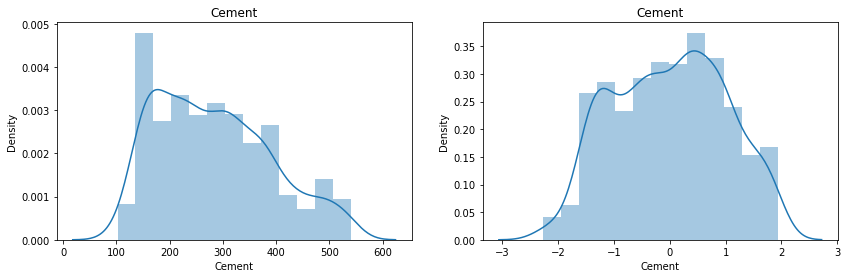

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


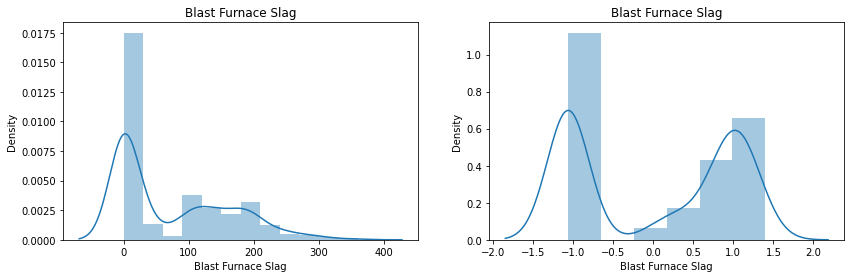

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


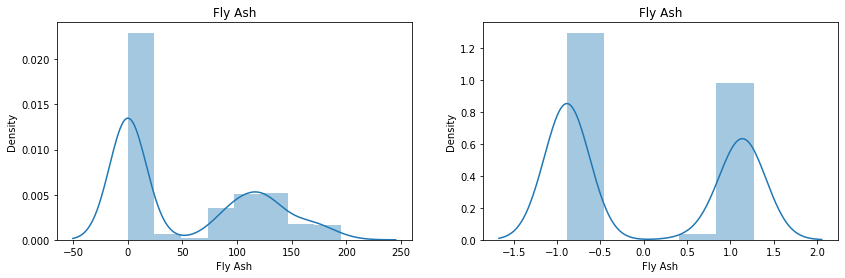

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


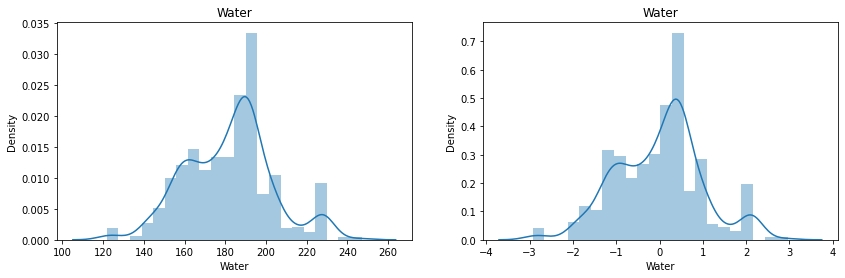

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


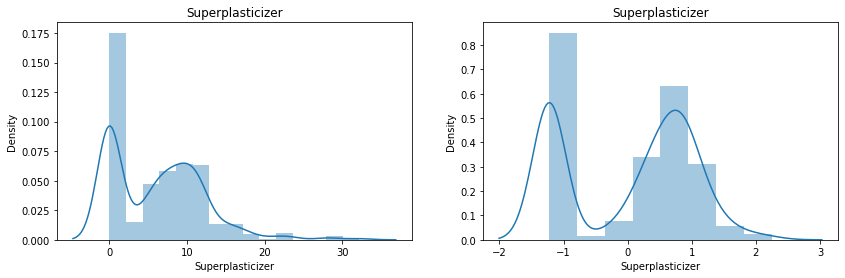

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


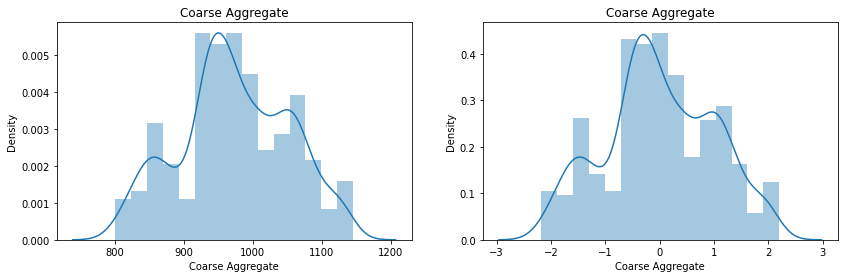

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


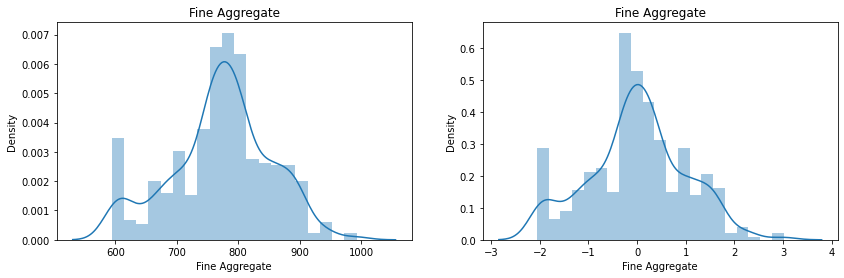

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


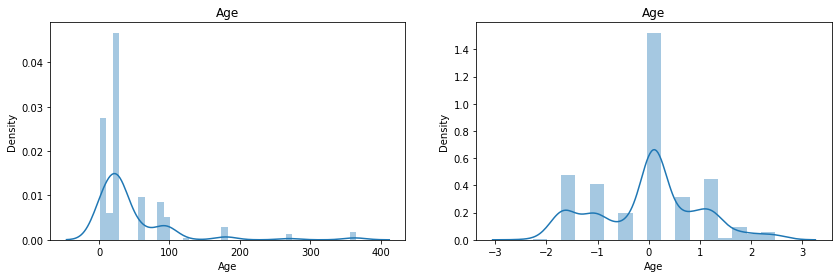

In [214]:
# Before and after comparision for Yeo-Johnson

for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed2[col])
    plt.title(col)

    plt.show()

In [216]:
# Side by side Lambdas

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.169544,0.174348
1,Blast Furnace Slag,0.016633,0.015715
2,Fly Ash,-0.136480,-0.161447
3,Water,0.808438,0.771307
4,Superplasticizer,0.264160,0.253935
5,Coarse Aggregate,1.129395,1.130050
6,Fine Aggregate,1.830763,1.783100
7,Age,0.001771,0.019885


# Feature Construction

In [2]:
df = pd.read_csv('train.txt')[['Age','Pclass','SibSp','Parch','Survived']]

df.dropna(inplace=True)

df.head()

,Age,Pclass,SibSp,Parch,Survived
0,22.0,3,1,0,0
1,38.0,1,1,0,1
2,26.0,3,0,0,1
3,35.0,1,1,0,1
4,35.0,3,0,0,0


In [3]:
X = df.iloc[:,0:4]
y = df.iloc[:,-1]

In [4]:
X,y

(      Age  Pclass  SibSp  Parch
 0    22.0       3      1      0
 1    38.0       1      1      0
 2    26.0       3      0      0
 3    35.0       1      1      0
 4    35.0       3      0      0
 ..    ...     ...    ...    ...
 885  39.0       3      0      5
 886  27.0       2      0      0
 887  19.0       1      0      0
 889  26.0       1      0      0
 890  32.0       3      0      0
 
 [714 rows x 4 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 885    0
 886    0
 887    1
 889    1
 890    0
 Name: Survived, Length: 714, dtype: int64)

In [5]:
np.mean(cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=20))


0.6933333333333332

In [6]:
#Feature Construction
X['Family_size'] = X['SibSp'] + X['Parch'] + 1
X.head()

,Age,Pclass,SibSp,Parch,Family_size
0,22.0,3,1,0,2
1,38.0,1,1,0,2
2,26.0,3,0,0,1
3,35.0,1,1,0,2
4,35.0,3,0,0,1


In [7]:
def myfunc(num):
    if num == 1:
        #alone
        return 0
    elif num >1 and num <=4:
        # small family
        return 1
    else:
        # large family
        return 2

In [8]:
myfunc(4)

1

In [9]:
X['Family_type'] = X['Family_size'].apply(myfunc)
X.head()

,Age,Pclass,SibSp,Parch,Family_size,Family_type
0,22.0,3,1,0,2,1
1,38.0,1,1,0,2,1
2,26.0,3,0,0,1,0
3,35.0,1,1,0,2,1
4,35.0,3,0,0,1,0


In [10]:
X.drop(columns=['SibSp','Parch','Family_size'],inplace=True)
X.head()

,Age,Pclass,Family_type
0,22.0,3,1
1,38.0,1,1
2,26.0,3,0
3,35.0,1,1
4,35.0,3,0


In [11]:
np.mean(cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=20))


0.7003174603174602

# Feature Splitting

In [12]:
df = pd.read_csv('train.txt')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df['Name']


0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [14]:
df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [15]:
df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: 0, Length: 891, dtype: object

In [16]:
df[['Title','Name']]


,Title,Name
0,Mr,"Braund, Mr. Owen Harris"
1,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,Miss,"Heikkinen, Miss. Laina"
3,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,Mr,"Allen, Mr. William Henry"
...,...,...
886,Rev,"Montvila, Rev. Juozas"
887,Miss,"Graham, Miss. Margaret Edith"
888,Miss,"Johnston, Miss. Catherine Helen ""Carrie"""
889,Mr,"Behr, Mr. Karl Howell"


In [17]:
(df.groupby('Title').mean()['Survived']).sort_values(ascending=False)


Title
the Countess    1.000000
Mlle            1.000000
Sir             1.000000
Ms              1.000000
Lady            1.000000
Mme             1.000000
Mrs             0.792000
Miss            0.697802
Master          0.575000
Col             0.500000
Major           0.500000
Dr              0.428571
Mr              0.156673
Jonkheer        0.000000
Rev             0.000000
Don             0.000000
Capt            0.000000
Name: Survived, dtype: float64

In [18]:
df['Is_Married'] = 0
df['Is_Married'].loc[df['Title'] == 'Mrs'] = 1

C:\Users\admin\AppData\Local\Temp\ipykernel_7380\2254989826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Is_Married'].loc[df['Title'] == 'Mrs'] = 1


In [19]:
df['Is_Married']


0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Name: Is_Married, Length: 891, dtype: int64

In [86]:
import pandas as pd

In [91]:
import vaex

ModuleNotFoundError: No module named 'vaex'